## How to work on the assignment

I expect 3 files from each group:
* **A file containing the best predictions from your best model (20%)**
* **A Jupyter notebook containing all the work the team did in order to deliver the best predictions (40%)**
* **A business report (40%)** explaining:
    * The goal
    * The work performed: include some detail about data cleaning, feature engineering and modelling
    * The results: meaningful metrics for the best models
    * Visualizations

No group presentation is expected for this assignment.

# Machine Learning 2 Group B - Machine Learning Workflow


#### Term 2 - Team B
Maria Graciela Missura Donoso <br>
Martina Cilia <br>
Alexander Humpert <br>
Ignacio Gonzalez <br>
Philippe Kerno <br>
Thomas Truyts<br>
Marco Nebuloni

#### Notebook Summary

This notebook contains the machine learning workflow for the Forest Cover Type Prediction Challenge. 

We iterated through four tree-based classification algorithms, hyperparameter optimization and feature creation techniques to arrive at our best model - a `hyper-parameter tuned Random Forest Classifier` with a test accuracy of 90.8%, trained on a dataset where manual feature creation was conducted.

# Table of Contents

* [1. Importing Libraries](#1)
* [2. Importing Data](#2)
* [3. Data Exploration](#3)
    * [3.1 Size, data types, missing features and label distribution](#3.1)
    * [3.2 Missing Data](#3.2)
    * [3.3 Finding Outliers](#3.3)
    * [3.4 Understanding How Features Interact](#3.4)
* [4. Baseline Model: Decision Tree Classifier](#4)
    * [4.1 Defining model evaluation and feature extraction functions](#4.1)
    * [4.2 Running Model](#4.2)
* [5. Changing our Model - Features](#5)
    * [5.1 Decision Tree Classifier with Extra Features](#5.1)
    * [5.2 Decision Tree Classifier with Feature Selection](#5.2)
* [6. Changing our model - Algorithms](#6)
    * [6.1 Random Forest Classifier with Extra Features](#6.1)
    * [6.2 Gradient Boosted Classifier with Extra Features](#6.2)
    * [6.3 Extra Trees Classifier with Extra Features](#6.3)
* [7. Changing our model - Hyperparameter Tuning](#7)
    * [7.1 Tuned Random Forest Classifier with Extra Features](#7.1)
    * [7.2 Tuned Extra Trees Classifier with Extra Features](#7.2)
* [8. Final Model - Voting Classifier](#8)
* [9.Saving Best Model Predictions](#9)




<a id='1'></a>
## 1. Importing Libraries

In [1]:
import time
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from graphviz import Source

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler, StandardScaler, RobustScaler)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn import tree, ensemble
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    classification_report
)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='2'></a>
## 2. Importing Data

In [2]:
import pandas as pd

# Reading test set
tester = pd.read_csv('test.csv').drop(columns = "Id")

# Reading train set
data = pd.read_csv('train.csv').drop(columns = "Id")

<a id='3'></a>
## 3. Data Exploration

In this section we will use different methods to understand our initial data better. This will give us information for building our first baseline model.

<a id='3.1'></a>
### 3.1 Size, data types, missing features and label distribution

In [3]:
# What does this train set look like?
print(f"Number of features in train set: {data.shape[1]}")
print(f"Number of rows in trains set: {data.shape[0]}")

Number of features in train set: 55
Number of rows in trains set: 15120


In [4]:
# What does this train set look like?
print(f"Number of features in test set: {tester.shape[1]}")
print(f"Number of rows in test set: {tester.shape[0]}")

Number of features in test set: 54
Number of rows in test set: 565892


As we can see, the test set has one less feature - the target variable "Cover_type".

In [5]:
# looking for the types of the data
print(f"Types of data in dataset:\n\n{data.dtypes}")

Types of data in dataset:

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_

Each feature in our dataset is a numeric data type. However, this does not exclude the possibility that the numeric feature represents categorical or binary information, afterall, these may be represented as numeric values. We have to some further digging.

In [6]:
# Identifying data type of each feature

data_stats = data.describe()
data_stats

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


By looking at summary statistics of our data, in particular "min" and "max", we see that each "Soil_Type" and "Wilderness_Area" feature is binary, encoded as 0 or 1. All remaining features are numeric, besides the target variable "Cover_Type", which is categorical. For convenience, we can go ahead and create two new dataframes based on these separate values for use down the line.

In [7]:
# Creating new dataframe of only numerical features
data_numeric = data.iloc[:, 0:10]

# Creating new dataframe of only binary features
data_binary = data.iloc[:, 10:].drop(columns = "Cover_Type")

print(f"Number of numeric features: {len(data_numeric.columns)}")
print(f"Number of binary features: {len(data_binary.columns)}")

Number of numeric features: 10
Number of binary features: 44


In [8]:
#Check target label distributions
target_prop = data["Cover_Type"].value_counts()

print(f"Proportion of target variables:\n{target_prop}")

Proportion of target variables:
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64


Our dataset is balanced. This is a huge relief as it means our model evaluation metrics, such as accuracy, are more trustworthy. Furthermore, we don't have to risk balancing the data by artificially creating more data.

In [9]:
# Looking at the data itself
data.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5


<a id='3.2'></a>
### 3.2 Missing Data

In [10]:
# Looking for missing values for each feature
print(f"Number of missing values:\n{data.isna().mean()}")


Number of missing values:
Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Typ

Here we can see that we have no missing values. We do not have to worry about imputing values.

<a id='3.3'></a>
### 3.3 Finding Outliers

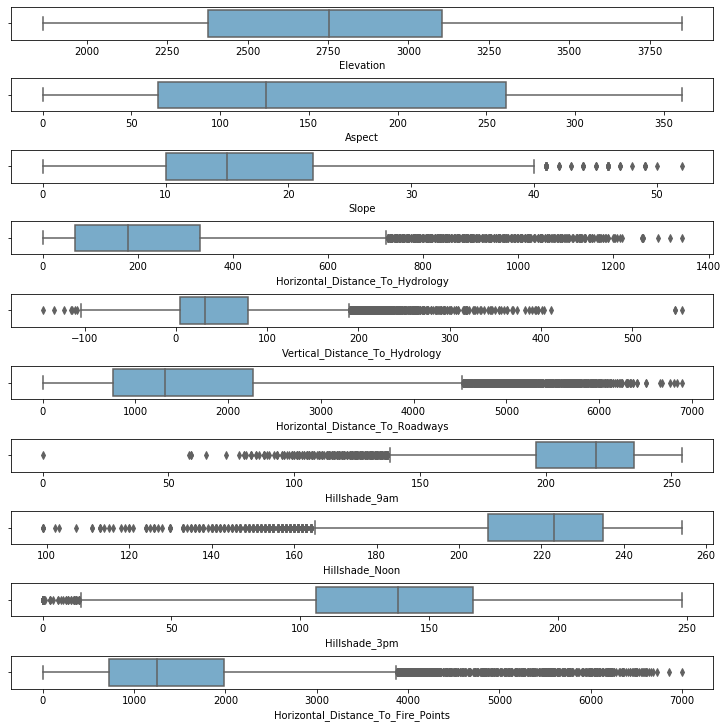

In [12]:
# Creating Box Plots
# Outliers in numerical features
fig, axes = plt.subplots(len(data_numeric.columns), 1, figsize=(10,10), constrained_layout=True)


for i, col in enumerate(data_numeric):
    sns.boxplot(x=data[col], palette='Blues_r', ax=axes[i])


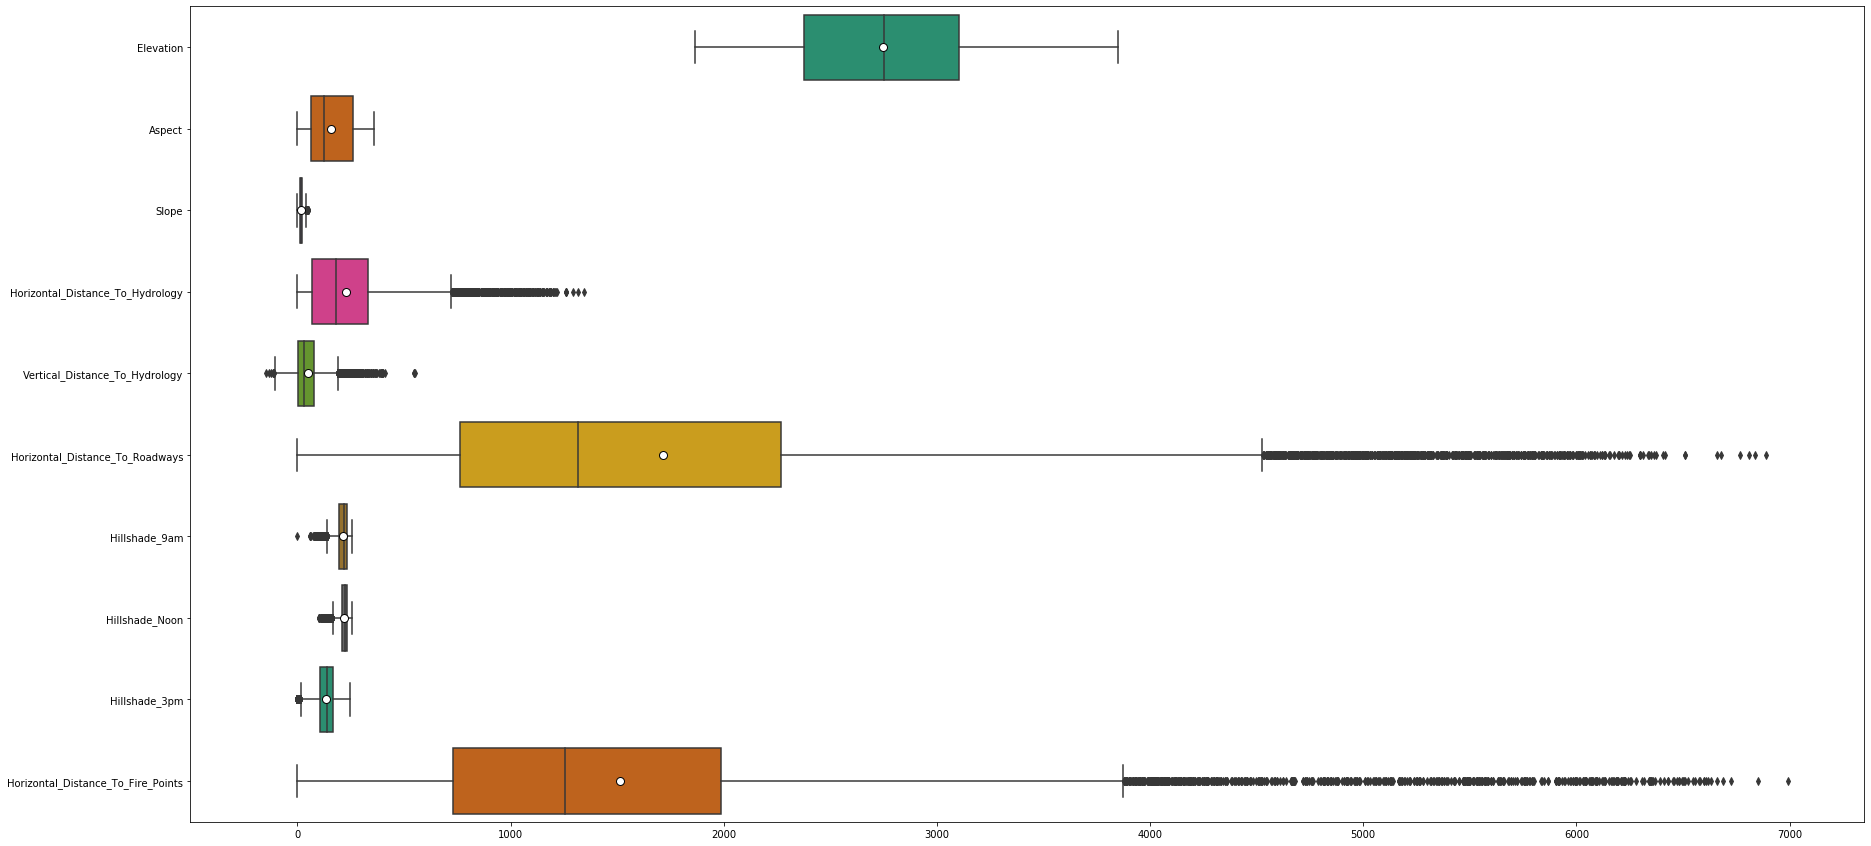

In [13]:
#Outliers in numerical features
plt.figure(figsize=(30,15))
boxplot = sns.boxplot(data=data_numeric, orient="h", palette="Dark2", showmeans=True, meanprops={"marker":"o",
"markerfacecolor":"white", "markeredgecolor":"black","markersize":"8"})

Every numerical feature besides Elevation and Aspect have outliers. This suggests we may have to consider outlier handling in our pipelines - perhaps through clamping, scaling or taking logs. Especially if we our considering using distance-based classification algorithms or feature selection techniques that are highly sensitive to ouliers.

<a id='3.4'></a>
### 3.4 Understanding How Features Interact

##### Correlations

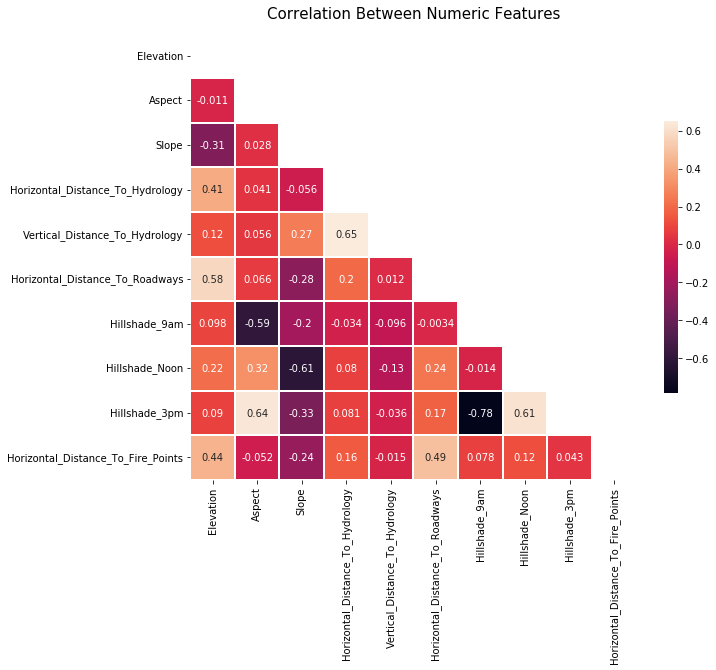

In [14]:
# Plotting correlation of numerical features as a heatmap

# Getting correlation values for numerical features
corr = data_numeric.corr()

# Plotting correlations as a heatmap
fig, ax = plt.subplots(figsize=(10,10))


# Generating a mask so that the only one half of the square has values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
graph = sns.heatmap(corr, annot=True, mask = mask, 
                    square=True, linewidths=1, cbar_kws={"shrink": .5})

# Adding title to figure
graph.set_title("Correlation Between Numeric Features", fontsize = 15, pad = 15)
plt.show()

##### Pairplots

In [15]:
# Adding "Cover_Type" column to numeric only dataframe
data_numeric["Cover_Type"] = data["Cover_Type"]

/Users/alexanderhumpert/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


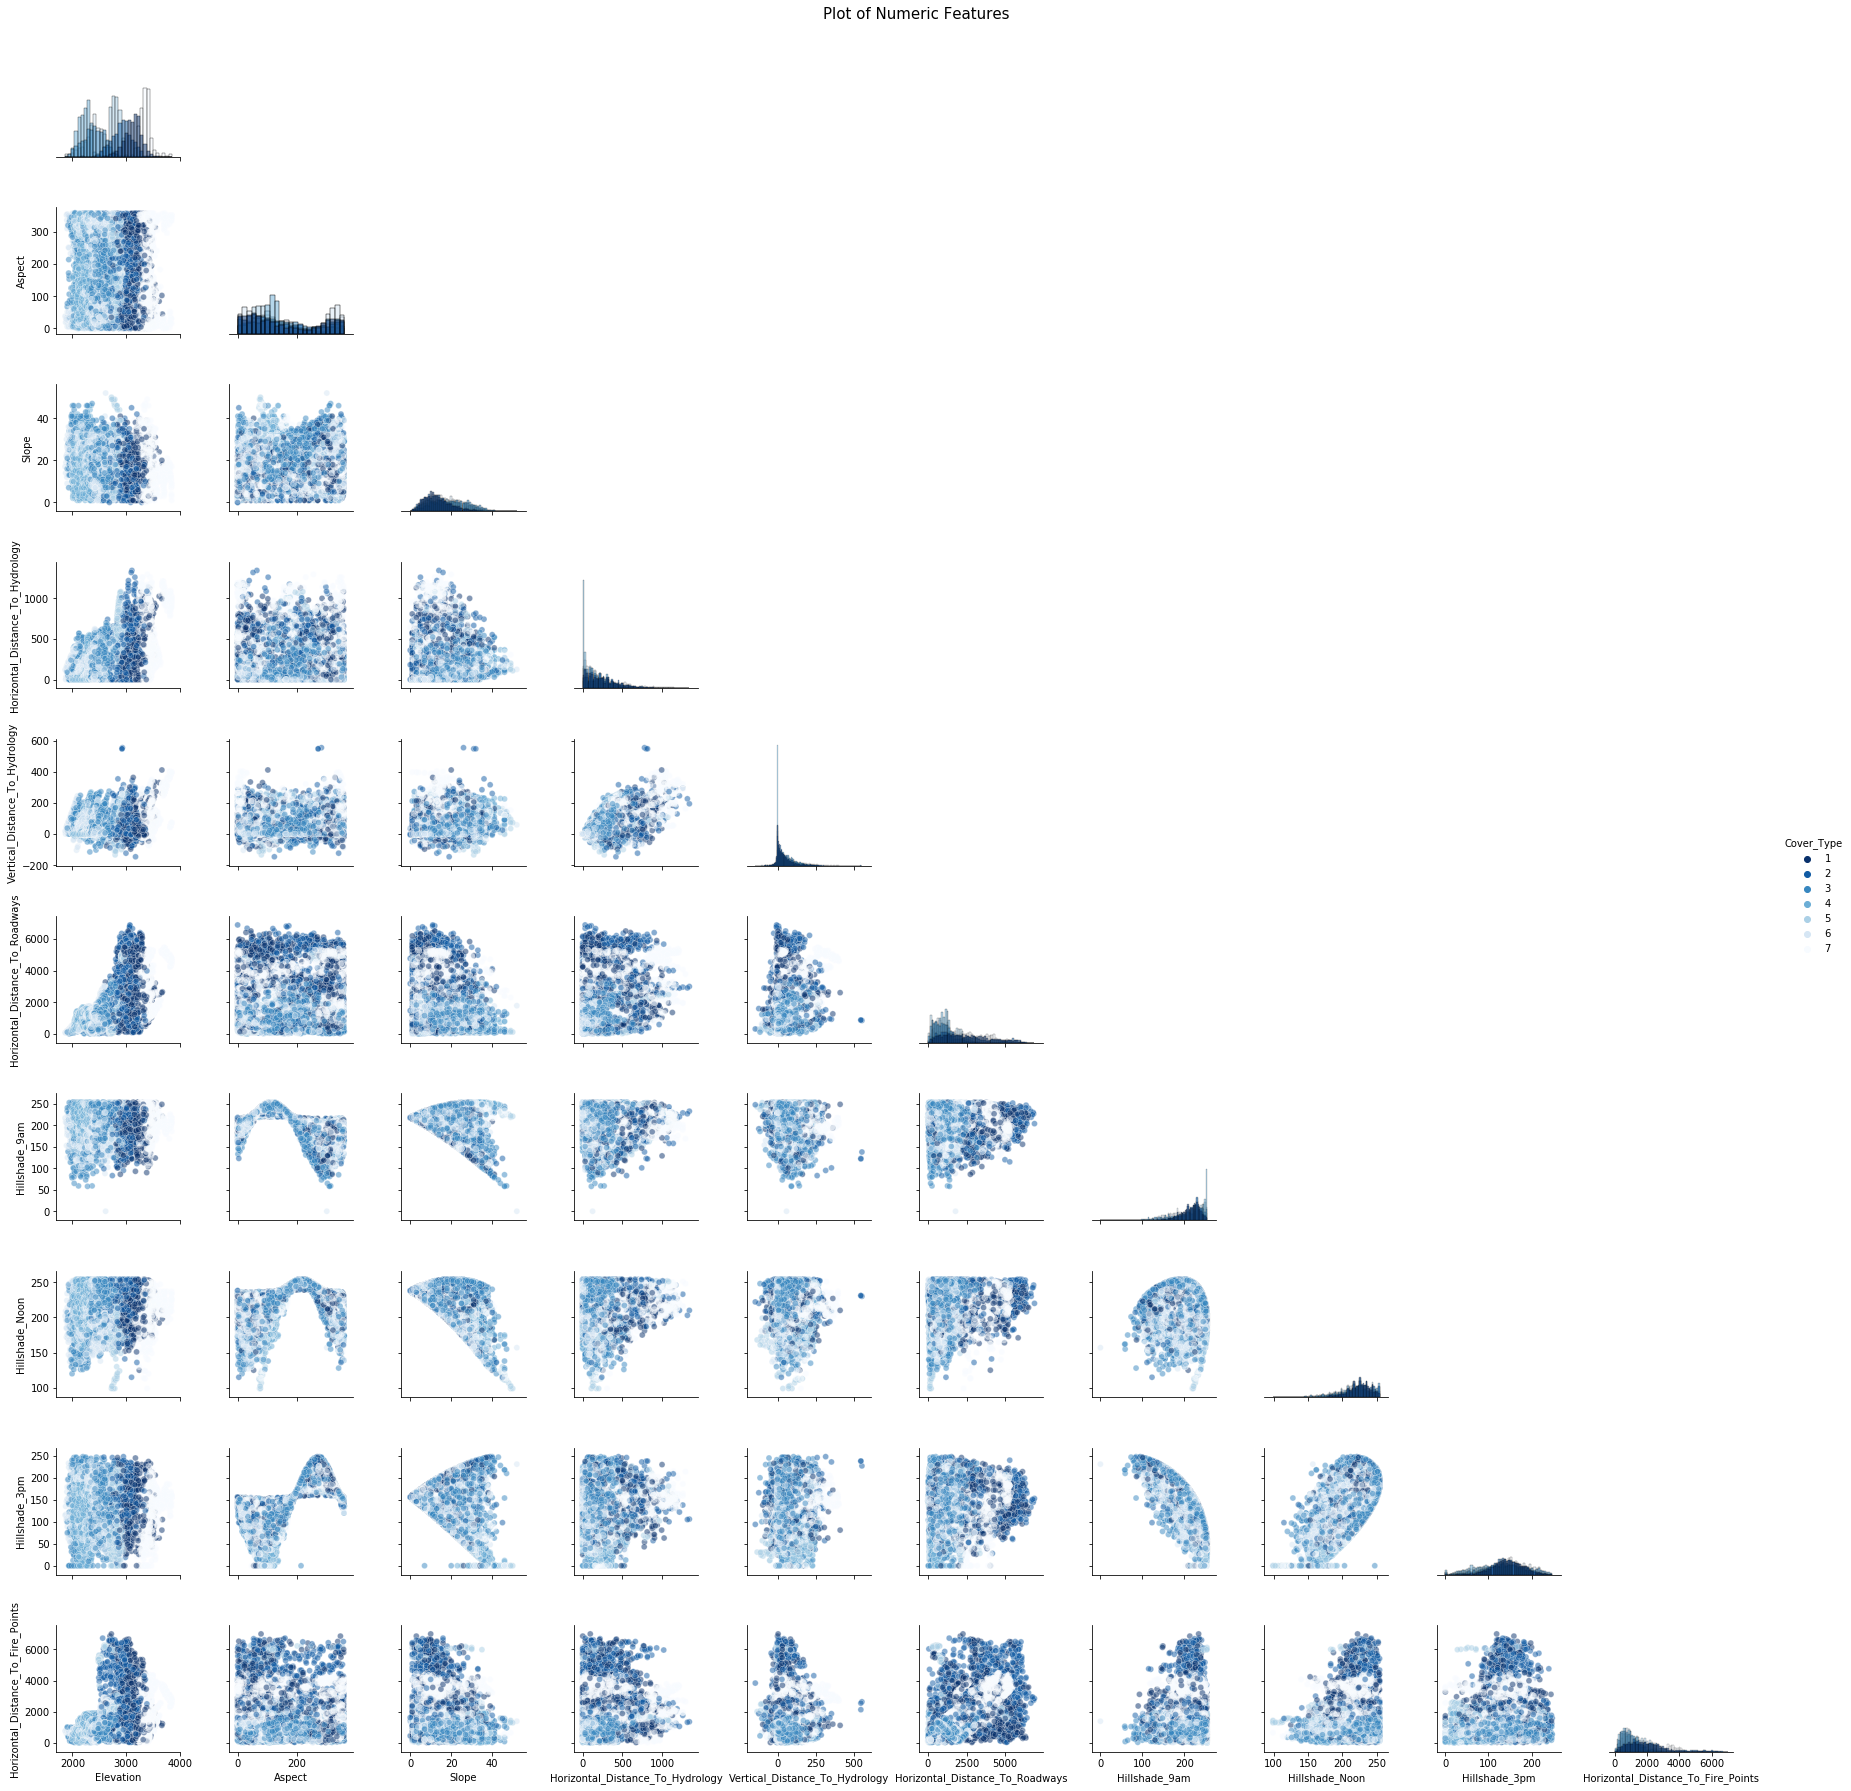

In [16]:
# Plotting scatter plots of numeric features by cover_type

# Creating pair plot
graph = sns.pairplot(data = data_numeric, 
                     hue = "Cover_Type",
                     palette='Blues_r',
                     diag_kind="hist",
                     corner=True,
                     plot_kws={'alpha': 0.5})

# Adding title to figure
graph.fig.suptitle("Plot of Numeric Features", y=1, fontsize = 15)
plt.show()

We can infer several points from the correlation and pairplot graphs. From the correlation matrix we have several pairings of highly positively and negatively correlated numeric features. From the scatter plots we can see that certain features highly influence the target variable - such as elevation. Let's take a closer look at the interaction of these features with the "Cover_Type".

Positively correlated pairings
 - `horizontal distance to hydrology` with `Vertical distance to hydrology` and `elevation`
 - `hillshade_3pm` with `hillshade_noon` and `aspect`

Negatively correlated pairings
 - `hillshade_9am` with `aspect` and `hillshade_3pm`
 - `hillshade_noon` with `slope`


##### Visualizing Distribution of Numerical features by cover_type

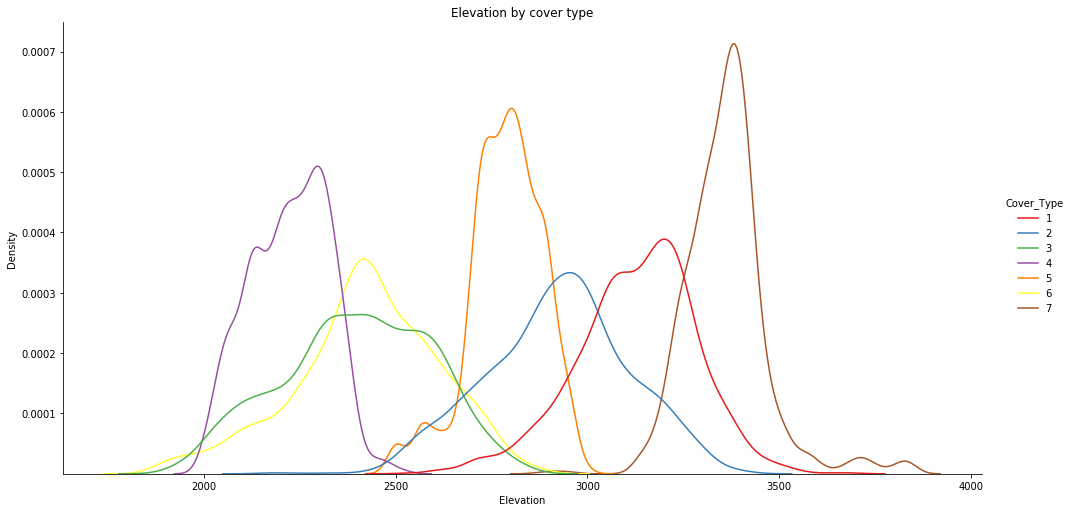

In [18]:
# Plotting distribution of Cover_Types by elevation

# Plotting Kernel Density Plots - not affected by bins used 
sns.displot(data, x="Elevation", 
    kind="kde",
    hue="Cover_Type",  
    palette="Set1", #"Accent or "Dark2"
    height=7, 
    aspect=2, 
    #fill=True,
).set(title = "Elevation by cover type")

From the density plots , we can clearly see that elevation contains important information, as Cover Types are clustered around different elevation levels. 

From here, we can use our intuition and infer that features that are themselves affected by the elevation, such as slope, aspect, vertical and horizontal based distance, might also have a strong interaction with cover_type. 

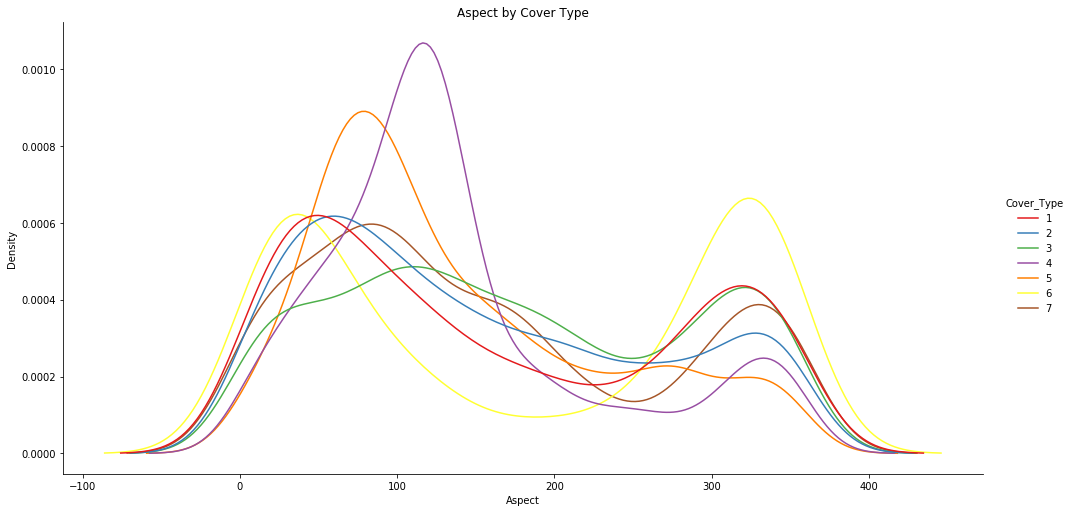

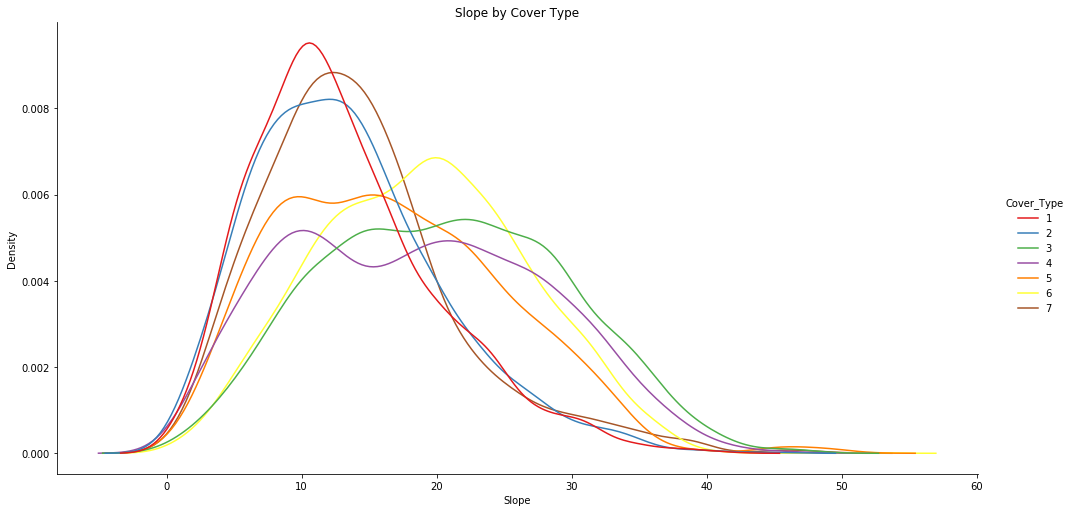

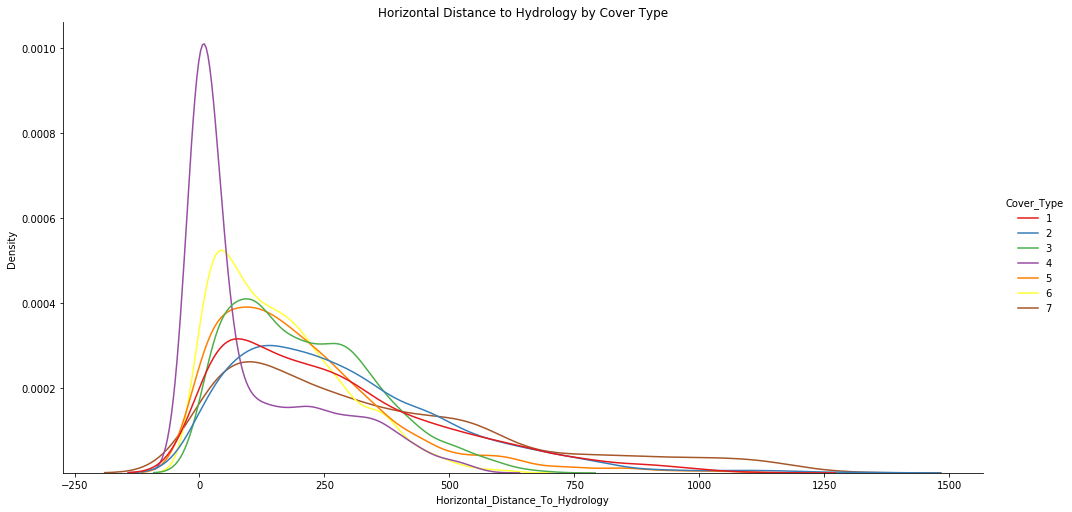

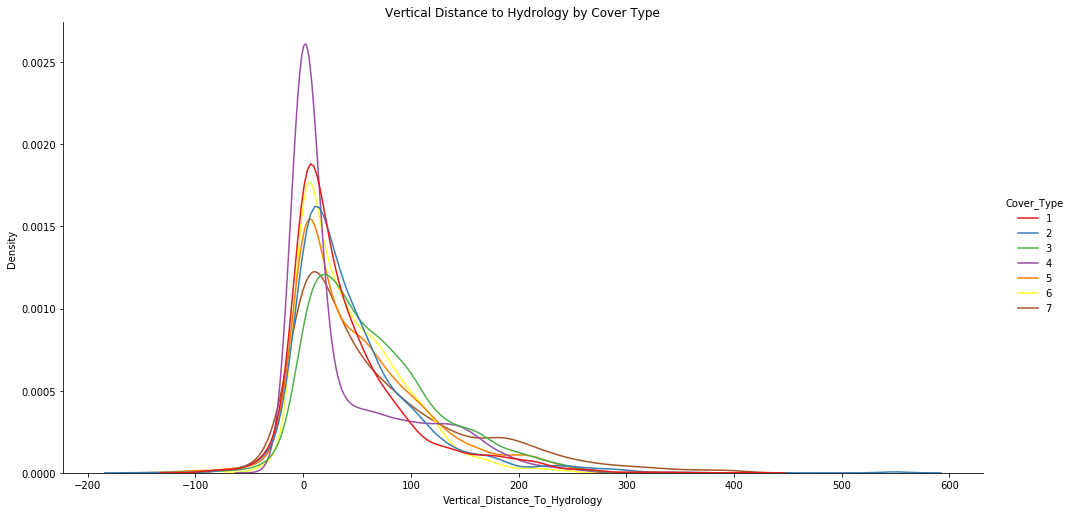

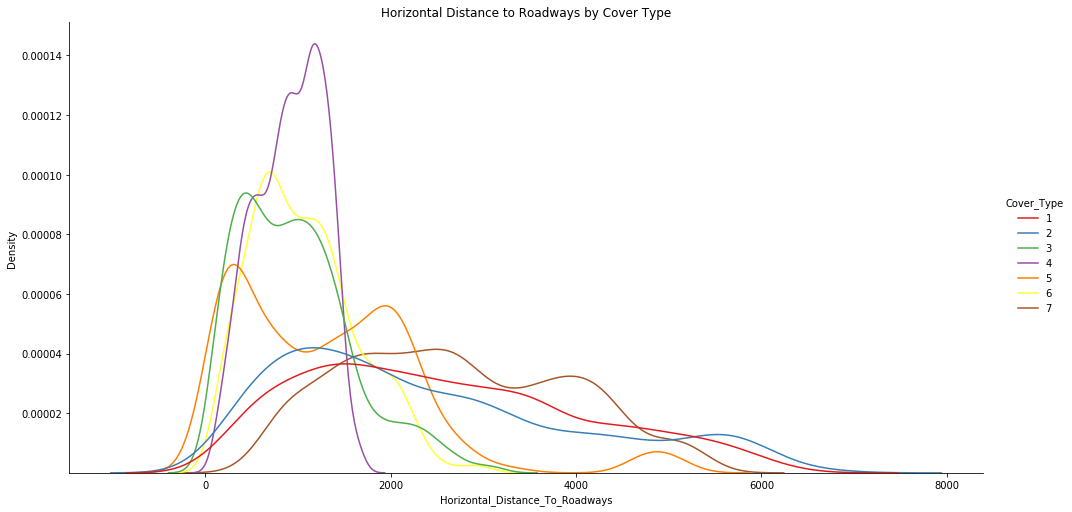

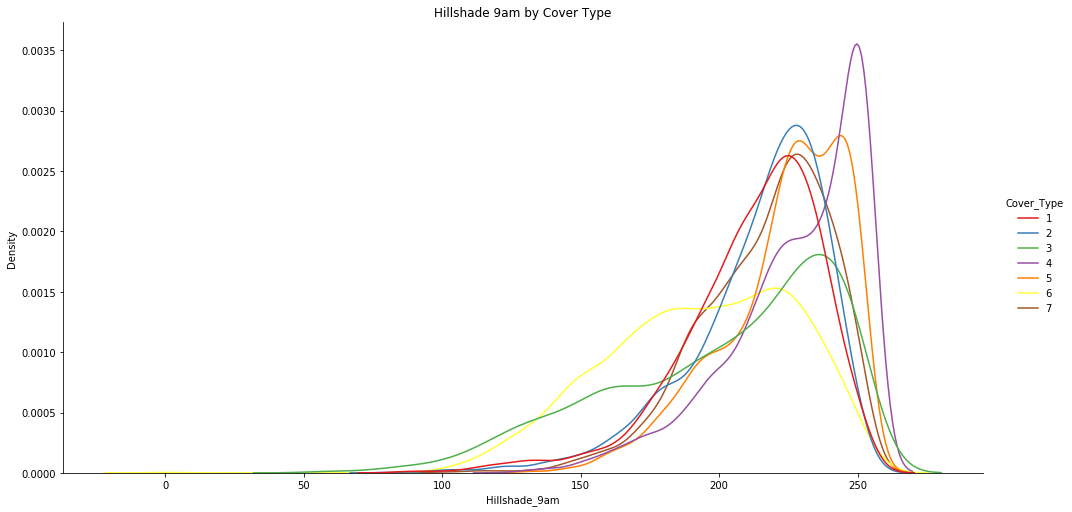

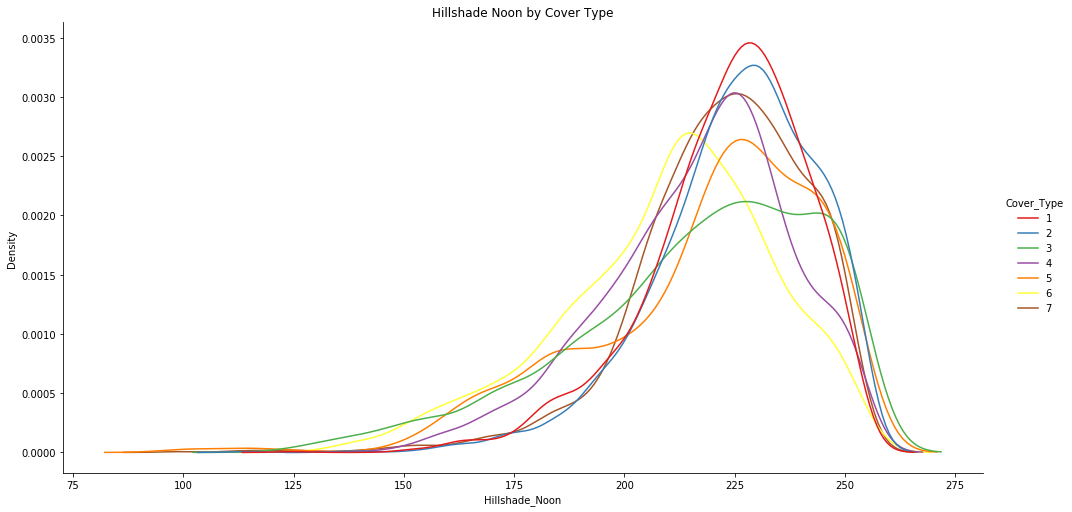

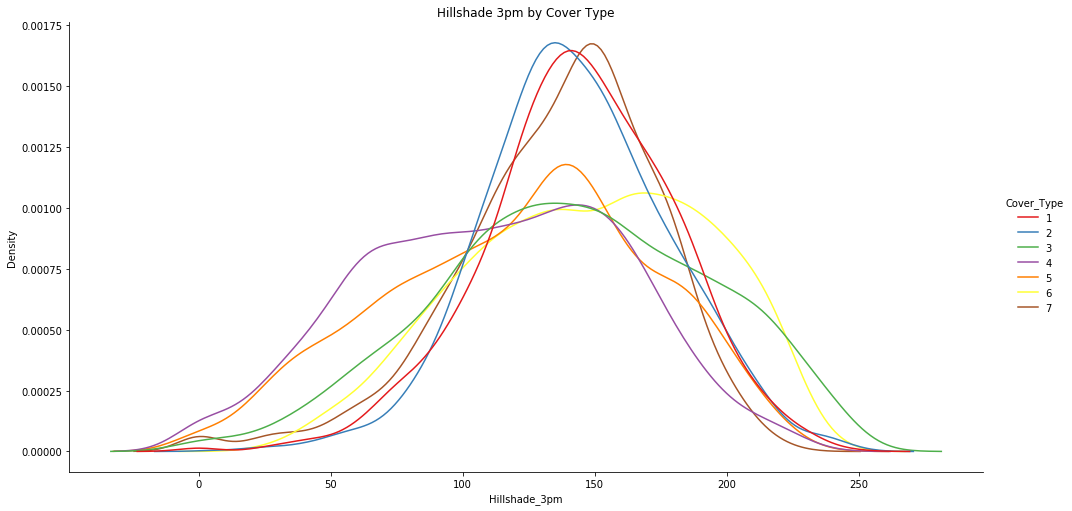

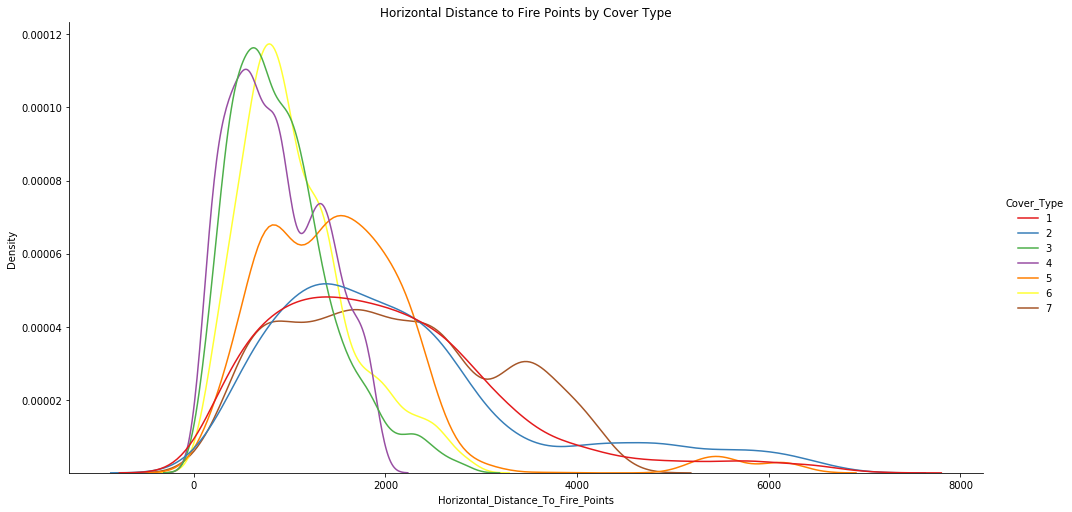

In [19]:
# Plotting distribution of Cover_Types by remaining numerical variables


#Density plots for all other numerical features -> less cover type distinction with these features
#Aspect
sns.displot(data, x="Aspect", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Aspect by Cover Type')

#Slope
sns.displot(data, x="Slope", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Slope by Cover Type')

#Horizontal_Distance_To_Hydrology
sns.displot(data, x="Horizontal_Distance_To_Hydrology", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Hydrology by Cover Type')

#Vertical_Distance_To_Hydrology
sns.displot(data, x="Vertical_Distance_To_Hydrology", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Vertical Distance to Hydrology by Cover Type')

#Horizontal_Distance_To_Roadways
sns.displot(data, x="Horizontal_Distance_To_Roadways", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Roadways by Cover Type')

#Hillshade_9am
sns.displot(data, x="Hillshade_9am", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade 9am by Cover Type')

#Hillshade_Noon
sns.displot(data, x="Hillshade_Noon", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade Noon by Cover Type')

#Hillshade_3pm
sns.displot(data, x="Hillshade_3pm", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade 3pm by Cover Type')

#Horizontal_Distance_To_Fire_Points
sns.displot(data, x="Horizontal_Distance_To_Fire_Points", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Fire Points by Cover Type')

##### Vizualizing distribution of Wilderness Areas by Cover_Type

[Text(0.5, 0, 'Wlderness Area')]

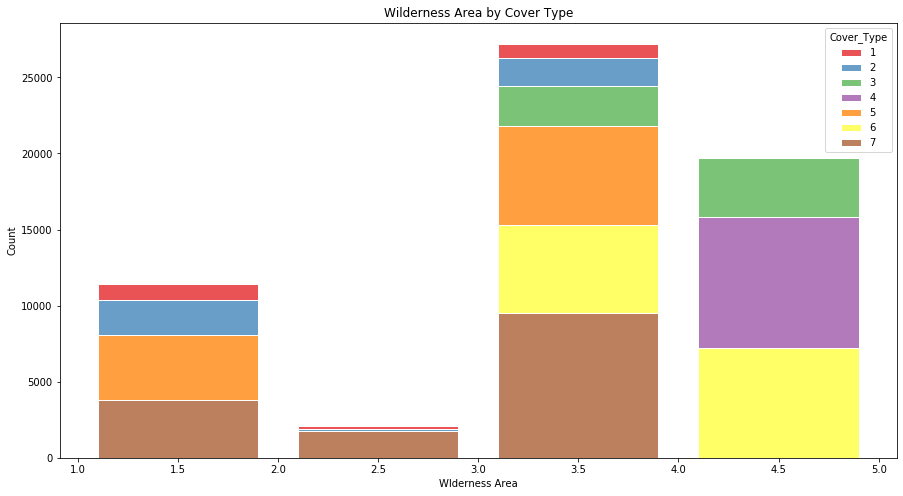

In [20]:
#Stacked bar plot for Wilderness dummy features -> cover type separation by wilderness area; Cache la Poudre only has specific cover types
#Wilderness Area 1 - Rawah
#Wilderness Area 2 - Neota
#Wilderness Area 3 - Comanche Peak
#Wilderness Area 4 - Cache la Poudre

# Defining function to reverse encode all binary features.
# Takes as input binary features and returns single categorical.
# Each category represents one of the four distinct wilderness area. 
def reverse_encode(relevant_subset):
    num_list =[]
    for i in relevant_subset.iloc:
        ix = 1
        for j in i:
            if j ==1:
                num_list.append(ix)
            else:
                ix +=1
    if relevant_subset.shape[0] == len(num_list):
        return num_list
    
wilderness = data.loc[:,"Wilderness_Area1":"Wilderness_Area4"]
wilderness_column = reverse_encode(wilderness)
wilderness_column_df = pd.DataFrame(wilderness_column)
merged_df = pd.concat([wilderness_column_df, data], axis=1, join='inner')

#Plotting Wilderness area by cover type
plt.figure(figsize=(15,8))
Wilderness_Area = sns.histplot(merged_df, x=0, binwidth=1, stat="count", binrange= (1,5), weights="Cover_Type", hue="Cover_Type",
multiple="stack", palette="Set1", edgecolor="white", shrink=0.8)
Wilderness_Area.set_title('Wilderness Area by Cover Type')
Wilderness_Area.set(xlabel="Wlderness Area")


From the stacked bar chart we see that certain Cover Types are more or less clustered around specific wilderness areas. For example, cover type 4 "Aspen" is present only in wilderness area 4, whereas cover types 1 and 2 "Spruce/Fir" and "Lodgepole Pine" are both present in wilderness areas 1 and 3.

From this, we can infer that correctly classifiying cover types scattered across different wilderness types will be more challenging than correctly classifying cover types more present in only one wilderness type. 

[Text(0.5, 0, 'Soily Type')]

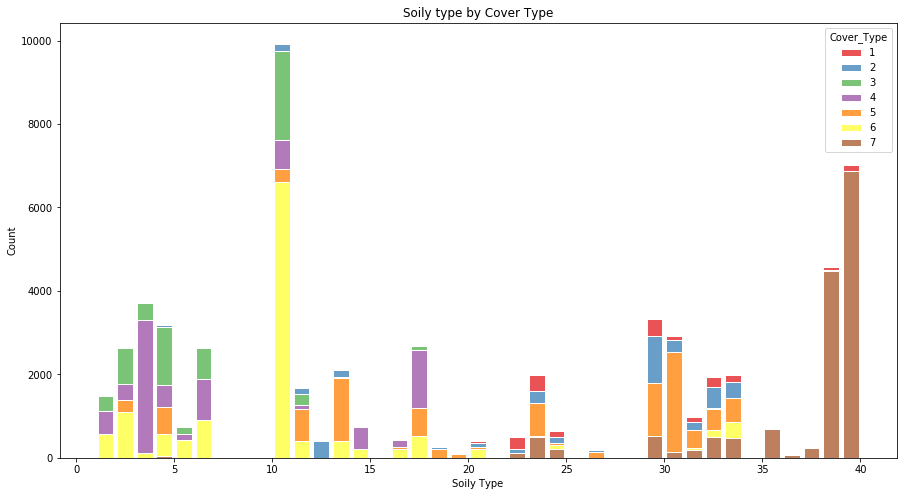

In [22]:
#Stacked bar plot for Soil Types dummy features
    
soil_type = data.loc[:,"Soil_Type1":"Soil_Type40"]
soil_type_column = reverse_encode(soil_type)
soil_type_column_df = pd.DataFrame(soil_type_column)
merged_df = pd.concat([soil_type_column_df, data], axis=1, join='inner')

#Plotting Wilderness area by cover type
plt.figure(figsize=(15,8))
soil_type = sns.histplot(merged_df, x=0, binwidth=1, stat="count", binrange= (1,40), weights="Cover_Type", hue="Cover_Type",
multiple="stack", palette="Set1", edgecolor="white", shrink=0.8)
soil_type.set_title('Soily type by Cover Type')
soil_type.set(xlabel="Soily Type")

From the stacked bar chart we see that different Cover Types are more or less clustered around specific soil types. For example, cover type 6 "Douglas/Fir" is present among many soil types while at the same time being heavily clustered in soil type 11.


<a id='4'></a>
## 4. Baseline Model: Decision Tree Classifier

The goal in this first model is to create a simple model with very few changes to our raw data. This baseline model will serve as a reference point for all subsequent changes we make. By setting a baseline first, we can then see how each of our changes (such as feature creation or algorithm selection) affect model performance.

Given the high number of features we have, our baseline model will be a `Decision Tree Classifier`. Not only can tree-based models handle a large feature set with minimal cleaning, but Decision Tree classifiers also have an in-built ranking of feature importance. This information will be very important going forward when conducting feature selection to improve our models. 


<a id='4.1'></a>
### 4.1 Defining model evaluation and feature extraction functions

To attain a nuanced understanding of our model evaluation, we will be using the accuracy, precision, recall and F1 score as well as print a confusion matrix for our test set predictions. To evaluate whether our model is overfitted, we will also print the accuracy score for a prediction on the train set.

To keep a clean notebook, we are defining the evaluation function and feature importance extractors upfront.

#### Model evaluation function

* The inputs are: 
    * model or pipeline fitted on the train data
    * X_train dataframe
    * y_train dataframe.
    * y_test dataframe.
    * Model_name as a string <br>


* Outputs: 
    * Confusion Matrix
    * Dataframe containing model evaluation metrics 

In [11]:
# Defining model evaluation function

def evaluation(model_or_pipe, X_train, X_test, y_train, y_test, model_name):  
    
    #Creating empty list to store model evaluation result 
    model_result = []
    
    # Predict on test data
    y_test_prediction = model_or_pipe.predict(X_test)

    # Predict on train data
    X_test_prediction = model_or_pipe.predict(X_train)
    
    # Evaluating model with classification report and confusion matrix
    acc_test = accuracy_score(y_test, y_test_prediction)
    acc_train = accuracy_score(y_train, X_test_prediction)
    precision = precision_score(y_test, y_test_prediction, average = 'macro')
    recall = recall_score(y_test, y_test_prediction, average = 'macro')
    f1 = f1_score(y_test, y_test_prediction, average = 'macro')
    cm = confusion_matrix(y_test, y_test_prediction) 

    #Storing results in list as key - value pairs
    model_result.append({
    "model": model_name,
    "train_accuracy": acc_train,
    "test_accuracy": acc_test, 
    "precision": precision,
    "recall":recall,
    "f1": f1
    })
    
    # Converting dictionary to dataframe
    accuracy_score_df = pd.DataFrame(model_result).set_index("model")

    
    # Plotting confusion matrix
    cm_df = pd.DataFrame(cm, 
                     index = [0,1,2,3,4,5,6], 
                     columns = [0,1,2,3,4,5,6])
    plt.figure(figsize=(8,8))
    sns.heatmap(cm_df, annot=True, square=True, linewidths=1, cbar_kws={"shrink": .5}, 
                xticklabels = ["1", "2", "3", "4", "5", "6", "7"],
                yticklabels = ["1", "2", "3", "4", "5", "6", "7"])
    plt.title(f"{model_name} \n Confusion Matrix", 
          size = 20, 
          pad = 15)
    plt.ylabel("Observed", size = 18, labelpad = 13)
    plt.xlabel("Predicted", size = 18, labelpad = 13)
    plt.show()
    
    # Printing dataframe with model evaluation metrics
    return accuracy_score_df

#### Feature importance function

The inputs are: model or pipeline fitted on the training data <br>
Outputs: dataframe containing features and respective importance score sorted by descending order.

In [12]:
# Defining feature importance function

def feature_importance(model_or_pipe):
    feat_imp = model_or_pipe.feature_importances_
    features = X_train.columns
    feat_imp_dt = pd.DataFrame({
        "feature": features, 
        "importance": feat_imp
    }).sort_values(by="importance", ascending=False).reset_index(drop=True)

    return feat_imp_dt

<a id='4.2'></a>
### 4.2 Running Model - Decision Tree Classifier on Raw Data

##### Splitting test and training sets

In [13]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [14]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 54)
y_Train: (12096,)
X_Test: (3024, 54)
y_Test: (3024,)


##### Building and Fitting Baseline Model

As we want to make no changes to our data, for our baseline model there is no need to pass a pipeline.

In [15]:
#Defining model to use and model name
model_0 = tree.DecisionTreeClassifier(random_state = 42)
model_0_name = "Decision Tree Classifier"

In [16]:
# Fitting model 
model_0.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

##### Evaluating model

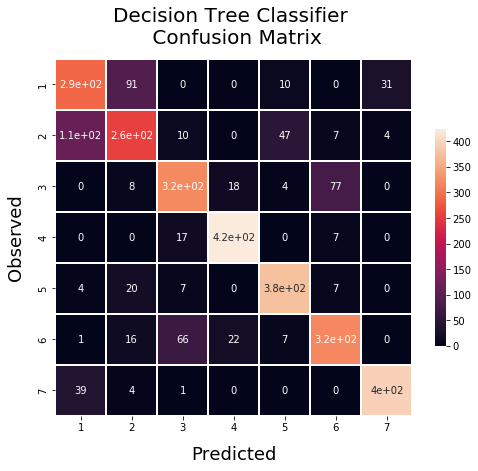

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Decision Tree Classifier,1.0,0.78869,0.785879,0.788125,0.786441


In [17]:
# Printing model performance
evaluation(model_0, X_train, X_test, y_train, y_test, model_0_name)

With a completed baseline model, we see that accuracy on the test set (the most important metric) has a score of `78.9%`, which is not a bad starting point from considering no feature engineering or hyperparameter tuning.

As expected, our Decision Tree has overfitted the training data. Without cross validation or pruning, this is to be expected. Our model currently has high variance and low bias. Later on, we can try Bagging and/or Boosting implementations of tree-based methods to mitigate the overfitting. 

#### Feature importance

In [33]:
# Calculating feature importance
feature_importance1 = feature_importance(model_0)


In [32]:
# Displaying feature importance 
feature_importance1

,feature,importance
0,Elevation,0.413382
1,Horizontal_Distance_To_Roadways,0.095239
2,Horizontal_Distance_To_Fire_Points,0.081076
3,Horizontal_Distance_To_Hydrology,0.069506
4,Hillshade_9am,0.059873
5,Vertical_Distance_To_Hydrology,0.038135
6,Aspect,0.034690
7,Hillshade_Noon,0.032227
8,Hillshade_3pm,0.031118
9,Slope,0.021515


In [48]:
#Calculating sum of top 10 features ranked by importance

top_10 = feature_importance1.loc[0:10, ["importance"]].sum()

print(f"Sum of top 10 features sorted by importance is : {round(top_10[0],3)}")

Sum of top 10 features sorted by importance is : 0.892


As expected, elevation is the feature with the highest importance, followed by (as expected) the three features with with the highest correlation coefficient with elevation. 

We can also observe that the top 10 most important features are all the numeric features. The binary features do not score well, with the highest score for Soil_Type4 at 0.015 - which is still very low. We can infer from this that binary features add very little information to our model. 

<a id='5'></a>
## 5. Changing our Model - Features

Now that we have a baseline model. We can improve the performance by creating new features, or reducing the number of features to eliminate redundancy in our dataset.

<a id='5.1'></a>
### 5.1 Decision Tree Classifier with Extra Features

The first changes that need to be made in order to improve the model's performance are the creation of new features in order to extract more valuable information from those originally provided. 

Although we already have many features, we see that information gain from 44 binary features is only 10%. Just the 10 numerical features explain 90% of the variance in the data. Creating features from the numerical features might therefore be a good idea. Let's try it out!



Many of the numerical features measure the distance of trees to landmarks in the ecosystem: fire points, hydrology, roadways. Because we lack domain expertise in this field, combining these values through average, sums and differences and adding them to our dataset might yield interesting results.


In [18]:
# Mean distances

data['Mean_Amenities'] = (data.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            data.loc[:,"Horizontal_Distance_To_Hydrology"]   +
                            data.loc[:,"Horizontal_Distance_To_Roadways"]) / 3

data['Mean_Fire_Hyd'] = (data.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            data.loc[:,"Horizontal_Distance_To_Hydrology"]) / 2                      

                            
data['Mean_Elevation_Vertical_Distance_Hydrology'] = (data.loc[:,'Elevation'] 
                                                    + data.loc[:,'Vertical_Distance_To_Hydrology'])/2

                            
data['Mean_Distance_Hydrology_Firepoints'] = (data.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                                 + data.loc[:,'Horizontal_Distance_To_Fire_Points'])/2

                            
data['Mean_Distance_Hydrology_Roadways'] = (data.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                               + data.loc[:,'Horizontal_Distance_To_Roadways'])/2

data['Mean_Distance_Firepoints_Roadways'] = (data.loc[:,'Horizontal_Distance_To_Fire_Points'] 
                                                + data.loc[:,'Horizontal_Distance_To_Roadways'])/2

data['EVDTH'] = data['Elevation'] - data['Vertical_Distance_To_Hydrology']


In [19]:
# Sums and Differences

data['HF1'] = data.loc[:,'Horizontal_Distance_To_Hydrology'] + data.loc[:,'Horizontal_Distance_To_Fire_Points']

data['HF2'] = abs(data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Fire_Points'])

data['HR1'] = abs(data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways'])

data['HR2'] = abs(data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Roadways'])

data['FR1'] = abs(data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Roadways'])

data['FR2'] = abs(data['Horizontal_Distance_To_Fire_Points'] - data['Horizontal_Distance_To_Roadways'])


In [20]:
# Redefining reverse encode function to print list of newly created categorical variables

def reverse_encode(relevant_subset):

    num_list =[]
    for i in relevant_subset.iloc:
        ix = 1
        for j in i:
            if j ==1:
                num_list.append(ix)
            else: 
                ix +=1
                
    print('The new list has the following elements: ' + str(set(num_list)))
    if relevant_subset.shape[0] == len(num_list):
        return num_list
    else: print('Error in compiling list: lengths of the two lists do not match.')

In [21]:
wilderness_train = data.loc[:,'Wilderness_Area1':'Wilderness_Area4']

soiltype_train = data.loc[:,'Soil_Type1':'Soil_Type40']

data["wilderness"] = reverse_encode(wilderness_train)

data["soiltypes"] = reverse_encode(soiltype_train)


The new list has the following elements: {1, 2, 3, 4}
The new list has the following elements: {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


#### Splitting Data

In [22]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [23]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 69)
y_Train: (12096,)
X_Test: (3024, 69)
y_Test: (3024,)


#### Buiding and Fitting model to train data

In [24]:
#Defining model to use and model name
model_1 = tree.DecisionTreeClassifier(random_state = 42)
model_1_name = "Decision Tree Classifier with New Features"

In [25]:
# Fitting model 
model_1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### Evaluating Model

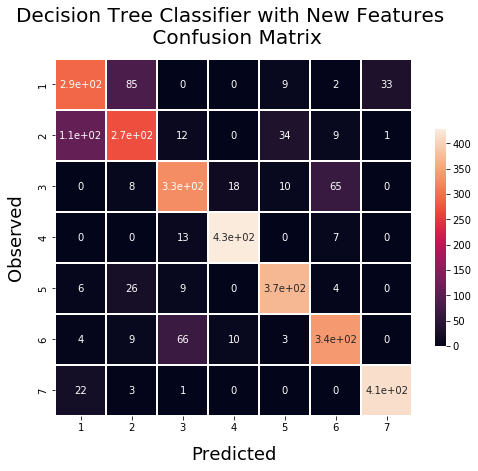

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Decision Tree Classifier with New Features,1.0,0.80787,0.805001,0.807039,0.805764


In [26]:
# Printing model performance
evaluation(model_1, X_train, X_test, y_train, y_test, model_1_name)

In [64]:
# Calculating feature importance
feature_importance2 = feature_importance(model_1)


In [69]:
feature_importance2.iloc[0:15,:]

,feature,importance
0,EVDTH,0.206246
1,soiltypes,0.138637
2,Elevation,0.135147
3,Hillshade_9am,0.049440
4,Horizontal_Distance_To_Hydrology,0.040415
5,Mean_Distance_Firepoints_Roadways,0.036462
6,FR2,0.035252
7,HR2,0.031729
8,HF2,0.026677
9,Hillshade_3pm,0.022628


In [66]:
#Calculating sum of top 10 features ranked by importance

top_10 = feature_importance2.loc[0:10, ["importance"]].sum()

print(f"Sum of top 10 features sorted by importance is : {round(top_10[0],3)}")

Sum of top 10 features sorted by importance is : 0.745


After adding new featues to our baseline DecisionTree, we see that accuracy has improved by 1.9%, from 78.9% to `80.8%`.

We can also see that the top 10 features now explain only 72% of the data against the previous 90% from the raw data. Of the new features created, EVDTH, soiltypes, mean distance_firepoints_roadways, FR2, HR2 and HF2 have made it into the top 10. 

This might indicate that the new features we have created are simply highly correlated to the pre-existing numerical features. Although we may have increased our accuracy, we may have done so that cost of introducing redundancy to our dataset. We can check this by plotting a heatmap correlation matrix of our new features and the original numerical features.


#### Correlation matrix of previous and newly created numerical features

In [46]:
# Creating dataframe with only numerical features
data_numeric_extra = data.drop(columns = data_binary.columns)

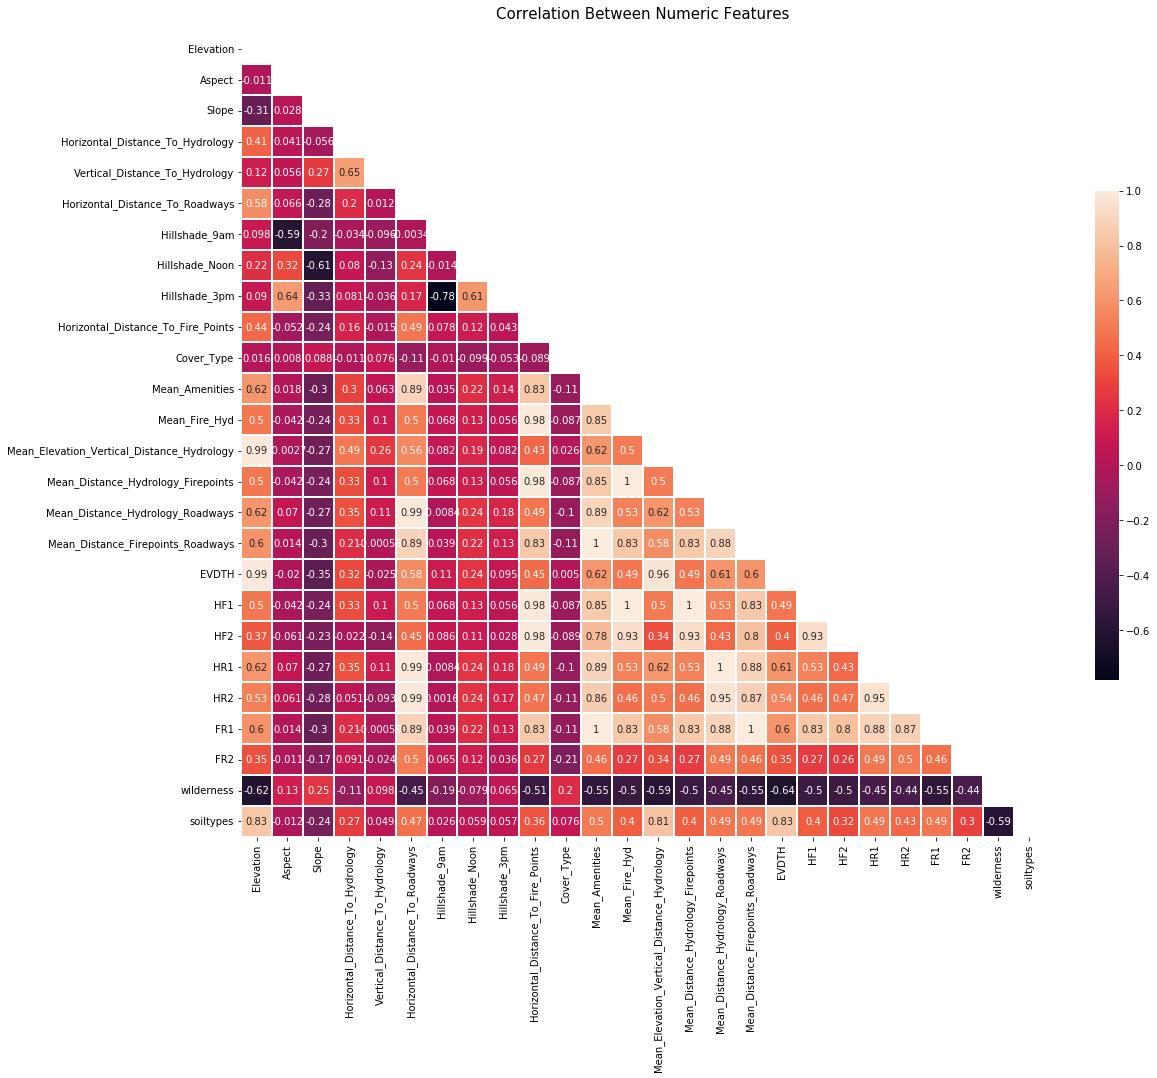

In [47]:
# Plotting correlation of numerical features as a heatmap

# Getting correlation values for numerical features
corr = data_numeric_extra.corr()

# Plotting correlations as a heatmap
fig, ax = plt.subplots(figsize=(18,18))


# Generating a mask so that the only one half of the square has values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
graph = sns.heatmap(corr, annot=True, mask = mask, 
                    square=True, linewidths=1, cbar_kws={"shrink": .5})

# Adding title to figure
graph.set_title("Correlation Between Numeric Features", fontsize = 15, pad = 15)
plt.show()

From a quick viewing, we can see that the correlation matrix has many highly and perfectly correlated variables. Therefore the consquence of adding more features has been to add redundancy to our dataset. 

Given these new features, we can try a feature selection technique built to transform linearly correlated features of a dataset into decorolated vectors - PCA.

<a id='5.2'></a>
### 5.2 Decision Tree Classifier with Feature Selection

By running PCA we can reduce redundancy in our numerical features by creating decorelated linear combinations. We can then select those most relevant linear combinations to feed into a model based on the cumulative percentage of the total variance in the dataset explained. 

Before implementing PCA however, we must be sure that our numerical features (1) do not contain outliers, (2) are scaled and, (3) are symmetric.

##### Splitting data into training and test sets

In [27]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Outlier handling on X_train set

In [28]:
# Saving names of categorical features to variable
data_categorical = ["soiltypes", "wilderness"]

# Creating train set with only numerical features
X_train_numerical = X_train.drop(columns = data_binary.columns)
X_train_numerical = X_train_numerical.drop(columns = data_categorical)

In [29]:
# Dropping Binary features from X_test set to match same columns with X_train set
X_test = X_test.drop(columns = data_binary.columns)

# Creating train set with only categorical features
X_train_categorical = X_train[["wilderness", "soiltypes"]]

# Final X_test
X_test = X_test.drop(columns = X_train_categorical.columns)

In [30]:
# Checking if X train and test sets have the same features
len(X_train_numerical.columns)  == len(X_test.columns)

True

In [31]:
### Defining outlier identificaiton method

outlier_df = X_train_numerical.describe()

def outlier_function_name(df, col_name):
    first_quartile = outlier_df[col_name][4]
    third_quartile = outlier_df[col_name][6]
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile+(1.5*IQR)
    lower_limit = first_quartile-(1.5*IQR)
    
    #Counting
    outlier_count = len(df[(df[col_name]>upper_limit) | (df[col_name]<lower_limit)])
    return lower_limit, upper_limit, outlier_count

In [32]:
# Printing number of outliers for each numerical feature

numeric = list(X_train_numerical.columns)
dic_outliers = {}
for column in numeric:
        print("There are {} outliers in {}".format(outlier_function_name(X_train_numerical, column)[2], column))
        dic_outliers[column] = outlier_function_name(X_train_numerical, column)[:2]

There are 0 outliers in Elevation
There are 0 outliers in Aspect
There are 42 outliers in Slope
There are 410 outliers in Horizontal_Distance_To_Hydrology
There are 422 outliers in Vertical_Distance_To_Hydrology
There are 668 outliers in Horizontal_Distance_To_Roadways
There are 330 outliers in Hillshade_9am
There are 321 outliers in Hillshade_Noon
There are 97 outliers in Hillshade_3pm
There are 516 outliers in Horizontal_Distance_To_Fire_Points
There are 440 outliers in Mean_Amenities
There are 407 outliers in Mean_Fire_Hyd
There are 9 outliers in Mean_Elevation_Vertical_Distance_Hydrology
There are 407 outliers in Mean_Distance_Hydrology_Firepoints
There are 607 outliers in Mean_Distance_Hydrology_Roadways
There are 548 outliers in Mean_Distance_Firepoints_Roadways
There are 0 outliers in EVDTH
There are 407 outliers in HF1
There are 563 outliers in HF2
There are 607 outliers in HR1
There are 636 outliers in HR2
There are 548 outliers in FR1
There are 647 outliers in FR2


In [33]:
# Clipping each outlier to the max or minimum non-outlier value

action = "clip" 
for cols,limits in dic_outliers.items():
    if action == 'drop':
        data = X_train_numerical[(X_train_numerical[cols]<=limits[1]) & (X_train_numerical[cols]>=limits[0])].reset_index()
        data = X_train_numerical.drop(columns = ['index'])
    elif action == 'clip':
        X_train_numerical.loc[X_train_numerical[cols]>limits[1],cols] = limits[1]
        X_train_numerical.loc[X_train_numerical[cols]<limits[0],cols] = limits[0]

In [34]:
# Inspect if outliers have been handled

numeric = list(X_train_numerical.columns)
dic_outliers = {}
for column in numeric:
        print("There are {} outliers in {}".format(outlier_function_name(X_train_numerical, column)[2], column))
        dic_outliers[column] = outlier_function_name(X_train_numerical, column)[:2]

There are 0 outliers in Elevation
There are 0 outliers in Aspect
There are 0 outliers in Slope
There are 0 outliers in Horizontal_Distance_To_Hydrology
There are 0 outliers in Vertical_Distance_To_Hydrology
There are 0 outliers in Horizontal_Distance_To_Roadways
There are 0 outliers in Hillshade_9am
There are 0 outliers in Hillshade_Noon
There are 0 outliers in Hillshade_3pm
There are 0 outliers in Horizontal_Distance_To_Fire_Points
There are 0 outliers in Mean_Amenities
There are 0 outliers in Mean_Fire_Hyd
There are 0 outliers in Mean_Elevation_Vertical_Distance_Hydrology
There are 0 outliers in Mean_Distance_Hydrology_Firepoints
There are 0 outliers in Mean_Distance_Hydrology_Roadways
There are 0 outliers in Mean_Distance_Firepoints_Roadways
There are 0 outliers in EVDTH
There are 0 outliers in HF1
There are 0 outliers in HF2
There are 0 outliers in HR1
There are 0 outliers in HR2
There are 0 outliers in FR1
There are 0 outliers in FR2


##### Creating pipeline to scale and limit skewness on numerical features

Having clipped the outliers of our numerical features, we have preserved all our observations. The next to clean our data is to scale and normalize them. To do this we are passing a standard scaler and power transformer to a pipeline and fitting this pipeline to the outlier handled numerical features.

A standard scaler was chosen to perserve the information of values with far distances from the mean.


In [35]:
# Defining pipeline with column transformations 
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("power transformer", PowerTransformer()),
])

# Fitting pipeline to x_train numerical features
x_train_scaled = pipeline.fit_transform(X_train_numerical)

# Converting scaled data to a dataframe and passing the feature names
x_train_scaled_data = pd.DataFrame(x_train_scaled, columns = X_train_numerical.columns)


To check the impact of our feature transformations, we will plot a histogram for each.

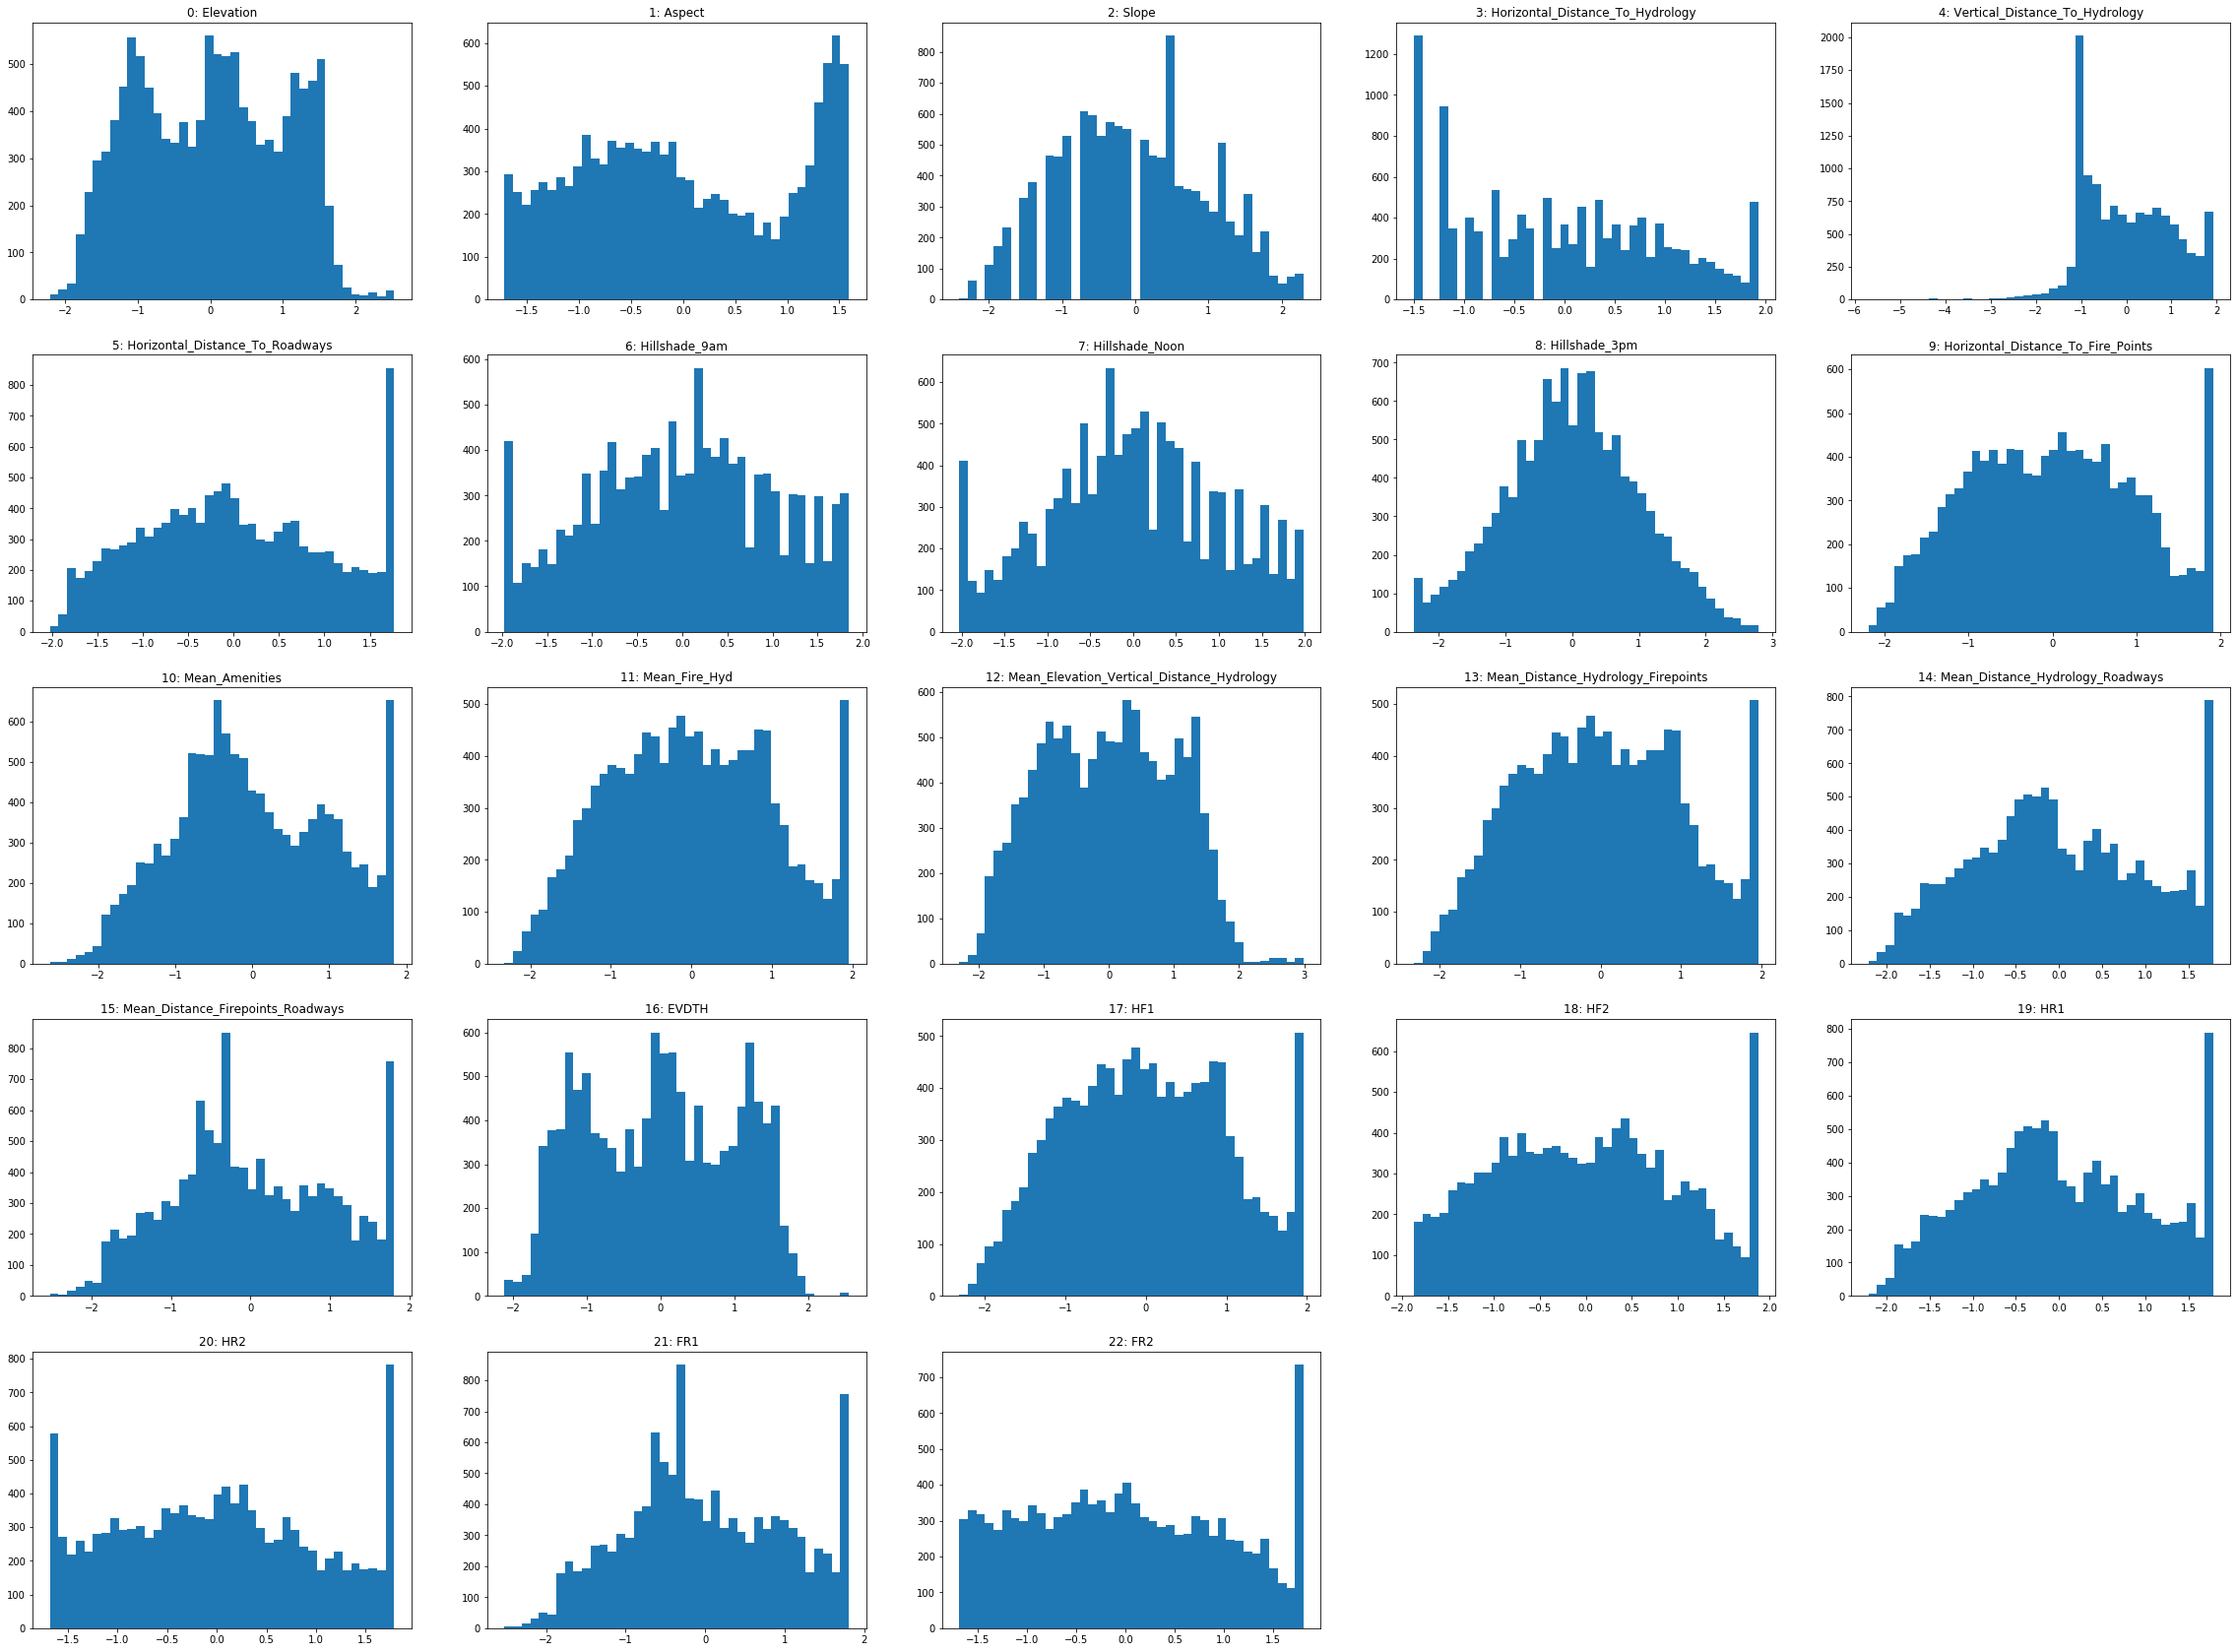

In [36]:
#Plotting each feature using a histogram
fig, axes = plt.subplots(5, 5, figsize=(40, 30))
for i, ax in enumerate(axes.ravel()):
    if i > 22:
        ax.set_visible(False)
        continue
    ax.hist(x_train_scaled_data.iloc[:, i], bins=40)
    ax.set_title("{}: {}".format(i, x_train_scaled_data.columns[i], fontsize = 20))

As we we can see by the probability density plots, each numerical feature has been transformed to the same scale. Many exhibit a somewhat normal distribution whereas some less.

Now that the numerical features have been handled, we can pass the dataframe to PCA transformer. We will determine how many principal components to use by observing the cumulutative variance explained.


##### Fitting PCA to X_train_remerged

In [37]:
pca = PCA()

In [38]:
# fit pipeline
pca.fit_transform(X_train_numerical)

model_2_name = "Decision Tree Classifier with PCA"

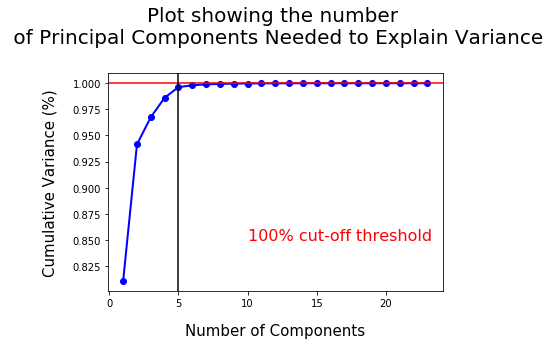

In [39]:
#Plotting cumulative variance
cumsum = np.cumsum(pca.explained_variance_ratio_)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, cumsum, 'o-', linewidth=2, color='blue')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(10, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)
plt.axvline(x = 5, color='black', linestyle='-')
plt.title('Plot showing the number \n of Principal Components Needed to Explain Variance', fontsize = 20, pad = 30)
plt.xlabel('Number of Components', fontsize = 15, labelpad = 15)
plt.ylabel("Cumulative Variance (%)", fontsize = 15, labelpad = 15)
plt.show()

Based on the graph above, it appears that only 2 components are needed to explain just below 95% of the total variance in the dataset. This is very impressive.

For the model, we will be passing 5 components. 5 components are close to explaining 100% of the cumulative variance before diminishing marginal returns kick in for further components.

##### Defining Pipeline

In [40]:
# Defining components to pass to PCA
pca = PCA(n_components = 5)

In [41]:
# Defining pipeline with pca and Decision Tree Classifier
pca_pipeline = Pipeline([
    ("pca", pca),
    ("model", tree.DecisionTreeClassifier(random_state = 42)),
])

##### Fitting Pipeline

Only the scaled numerical features will be passed to the pipeline. By virtue of being categorical features, linear relationships between Soiltypes and Wilderness columns with the numerical features has no meaning.

In [42]:
# fit pipeline
pca_pipeline.fit(X_train_numerical, y_train)

model_2_name = "Decision Tree Classifier with PCA"

In [43]:
print(f"X_train_numerical: {X_train_numerical.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_train_numerical: (12096, 23)
y_Train: (12096,)
X_Test: (3024, 23)
y_Test: (3024,)


##### Evaluating Model

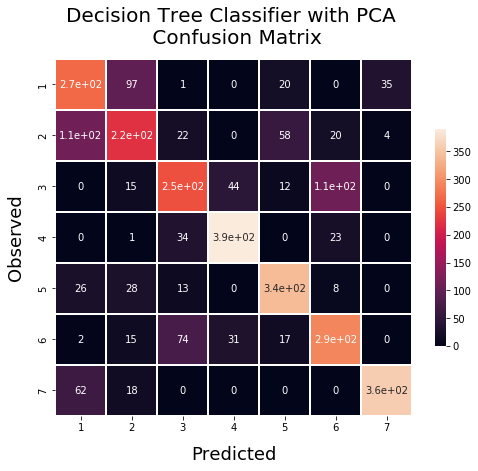

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Decision Tree Classifier with PCA,1.0,0.70205,0.70182,0.701404,0.700447


In [44]:
evaluation(pca_pipeline, X_train_numerical,  X_test, y_train, y_test, model_2_name)

Our model's performance decreased after passing 5 decorelated lineary components derived from our scaled numerical features. Falling to `70.2%` accuracy from the 78.9% with only raw data. The model accuracy suggests linear combinations of numerical features are significant, however, they do not help to improve accuracy versus raw data.

The baseline Decision Tree Classifier performed best with the dataset with manual feature creation, scoring `80.8%`. We are clearly on the right track, so we can move on to the next step in our process and start testing different algorithms on our expanded dataset.

<a id='6'></a>
## 6. Changing our Model - Algorithm

Decision Tree Classifier is a simple implementation of tree-based methods. Now we want to try some more complex algorithms. Specifically - RandomForest and ExtraTree Classifiers.

<a id='6.1'></a>
### 6.1 Random Forest Classifier with Extra Features

Random Forest Classifier is a more sophisticated implementation of Decision Trees that uses Bagging. Bagging involves creating many Decision Trees using sub-samples of the training data (with replacement), and then averaging the model to optimize variance and bias.

Without any pruning, bagging results in models that can generalize better than a single decision tree. 

##### Splitting train and test data

In [45]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [46]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 69)
y_Train: (12096,)
X_Test: (3024, 69)
y_Test: (3024,)


##### Buiding and Fitting model to train data

In [47]:
#Defining model and model name
model_3 = RandomForestClassifier(random_state = 42)
model_3_name = "Random Forest Classifier with New Features"

In [48]:
# Fitting model 
model_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Evaluating Model

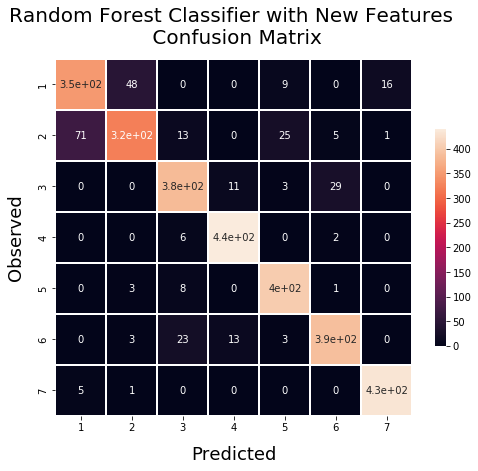

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Random Forest Classifier with New Features,1.0,0.901124,0.89918,0.900865,0.899188


In [49]:
# Printing model performance
evaluation(model_3, X_train, X_test, y_train, y_test, model_3_name)

The Random Forest Classifier performs significantly better than the Decision Tree Classifier. Trained on the dataset with exdtra features, the model accuracy jumped by 9.3% from 80.8% to `90.1%`.

<a id='6.2'></a>
### 6.2 Gradient Boosted Classifier with Extra Features

Gradient Boosting is a more sophisticated implementation of Decision Trees that uses boosting. Unlike the Random Forest classifier that trains many trees in parallel and combines the results, Boosting is more sophisticated. The trees are built sequentially, with each new tree created to minimize the prediction error of the previous tree. Performance is evaluated along the way resulting in an optimized calculation.

#### Splitting train and test data

In [50]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Buiding and Fitting model to train data

In [51]:
#Defining model to use and model name
model_4 = GradientBoostingClassifier(random_state = 42)
model_4_name = "Gradient Boosting Classifier with New Features"

In [52]:
# Fitting model 
model_4.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Evaluating Model

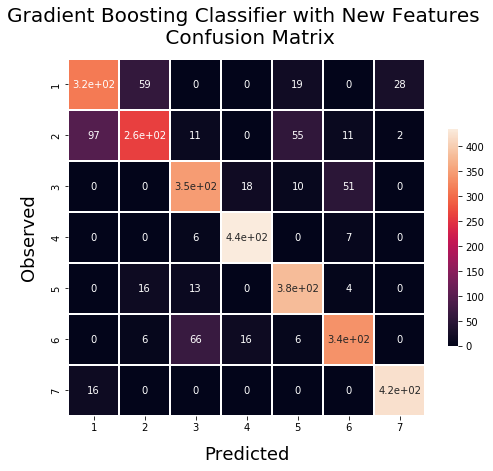

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Gradient Boosting Classifier with New Features,0.869461,0.829034,0.825398,0.828511,0.824781


In [53]:
# Printing model performance
evaluation(model_4, X_train, X_test, y_train, y_test, model_4_name)

The performance of the Gradient Boosting model was not an improvement over our Random Forest. Improving the model accuracy only by 2.1%, from 80.8% to `82.9%`. Due to the nature of how Gradient Boosting is calculated it requires some degree of hyperparameter tuning to truly be effective. 

<a id='6.3'></a>
### 6.3 Extra Trees Classifier (Extrememely Randomized Trees) with Extra Features

The Extra Trees Classifier follows a similar implementation to Random Forest with two key differences. First, unless specified, it does not boostrap, therefore it samples randomly without replacement. Second, nodes are split randomly, rather than on the best splits, i.e. independent of the labels of the train set.

Another consideration is that Extra Trees is computationally faster than Random Forest Classifiers.

#### Splitting train and test data

In [54]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

#### Buiding and Fitting model to train data

In [55]:
#Defining model to use and model name
model_5 = ExtraTreesClassifier(random_state = 42)
model_5_name = "Extra Trees Classifier with New Features"

In [56]:
# Fitting model 
model_5.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

#### Evaluating Model

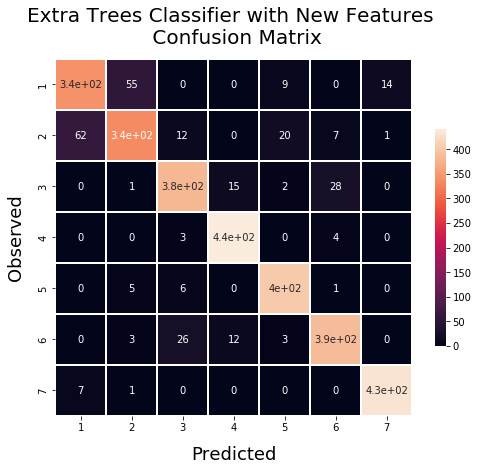

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Extra Trees Classifier with New Features,1.0,0.901786,0.899809,0.901415,0.900208


In [57]:
5# Printing model performance
evaluation(model_5, X_train, X_test, y_train, y_test, model_5_name)

The Extra Trees Classifier performs significantly better than the Decision Tree Classifier, and has the same accuracy as the Random Forest - `90.2%`.


Given that the Random Forest and Extra Trees Classifiers have performed the same we will perform hyperparameter tuning on both. Since both achieved similar accuracy scores, it makes sense to tune both of them. Given their slight differnce in implementation, one might perform better than the other given the dataset.

Furthermore, by tuning the models, we can further mitigate issues with overfitting by pruning the trees and cross-validating the results.

<a id='7'></a>
## 7. Changing our Model - Hyperparameter Tuning

The best performing models were Random Forest and Extra Trees classifier with extra features generated. We can now pass on to the next phase and tune the hyperparameters of these models. 

<a id='7.1'></a>
### 7.1 Random Forest GridSearch CV

##### Splitting data for training and test set

In [58]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Defining Parameter Grid to iterate through

In [117]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(500, 800, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 200, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### Fitting grid search to train data

In [271]:
grid_search = GridSearchCV(
                        RandomForestClassifier(random_state=42), 
                        random_grid, 
                        cv = 2, 
                        n_jobs = -1,
                        verbose = 2)


start = time.time()
# fit pipeline
grid_search.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 2 folds for each of 1080 candidates, totalling 2160 fits


KeyboardInterrupt: 

Passing a rather large hyperparamter grid took 9 hours to process. A tad bit time consuming. 
By fishing out the optimal parameters and passing them to a RandomForest classifier, we can evaluate if this tuning was worth the time.


In [118]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

In [59]:
# Optimal parameters
rfbest_bootstrap = False
rfbest_max_depth = 50
rfbest_max_features = "auto"
rfbest_min_samples_leaf = 1
rfbest_min_samples_split = 2
rfbest_n_estimators = 752

##### Buiding and Fitting model to train data

In [60]:
#Defining model to use and model name
model_6 = RandomForestClassifier(random_state = 42,
                                 n_estimators = rfbest_n_estimators,
                                 max_depth = rfbest_max_depth,
                                 min_samples_split = rfbest_min_samples_split,
                                 min_samples_leaf = rfbest_min_samples_leaf,
                                 max_features = rfbest_max_features,
                                 bootstrap = rfbest_bootstrap)


model_6_name = "Tuned Random Forest Classifier with New Features"

In [61]:
# Fitting model 
model_6.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=752,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

##### Evaluating model

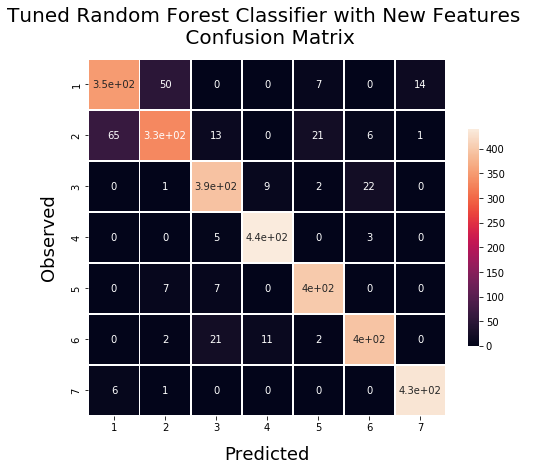

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Tuned Random Forest Classifier with New Features,1.0,0.90873,0.906913,0.908456,0.907224


In [62]:
# Printing model performance
evaluation(model_6, X_train, X_test, y_train, y_test, model_6_name)

Accuracy only improved by 0.8%, from 90.1% to `90.9%`. Although this is a welcome improvement, it may have not been worth the 9 hours. For our next models, we can try a RandomSearchCV.

The benefits of a random search cv versus a grid search cv comes down to resource use. A random search iterates through the hyperparameter combinations by identifying a direction that works and evaluating hyperparameters that maintain this direction. Therefore, we can pass a large parameter grid, and iterate more quickly through it than with a GridSearch. 

<a id='7.2'></a>
### 7.2 Extra Trees Classifier - Random Search CV

##### Splitting data for training and test set

In [63]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Defining Parameter Grid to iterate through

In [125]:
# Number of trees in Extra Trees
n_estimators = [int(x) for x in np.linspace(500, 800, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 200, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### Fitting Random search to train data

In [ ]:
rnd_search = RandomizedSearchCV(
                        ExtraTreesClassifier(random_state=42), 
                        random_grid, 
                        cv = 2, 
                        n_jobs = -1,
                        verbose = 2)


start = time.time()
# fit pipeline
rnd_search.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

The improvement in processing time is astounding. In just over 1 minute we have iterated over the parameter grid to find an optimal model. We can now investigate what impact this has had on model performance.

In [273]:
rnd_search.best_params_

{'n_estimators': 650,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 87,
 'bootstrap': False}

In [64]:
# Optimal parameters
etbest_bootstrap = False
etbest_max_depth = 87
etbest_max_features = "sqrt"
etbest_min_samples_leaf = 1
etbest_min_samples_split = 5
etbest_n_estimators = 650

##### Buiding and Fitting model to train data

In [65]:
#Defining model to use and model name
model_7 = ExtraTreesClassifier(random_state = 42,
                                 n_estimators = etbest_n_estimators,
                                 max_depth = etbest_max_depth,
                                 min_samples_split = etbest_min_samples_split,
                                 min_samples_leaf = etbest_min_samples_leaf,
                                 max_features = etbest_max_features,
                                 bootstrap = etbest_bootstrap)


model_7_name = "Tuned Extra Trees Classifier with New Features"

In [78]:
# Fitting model 
model_7.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=87, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=650,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

##### Evaluating Model

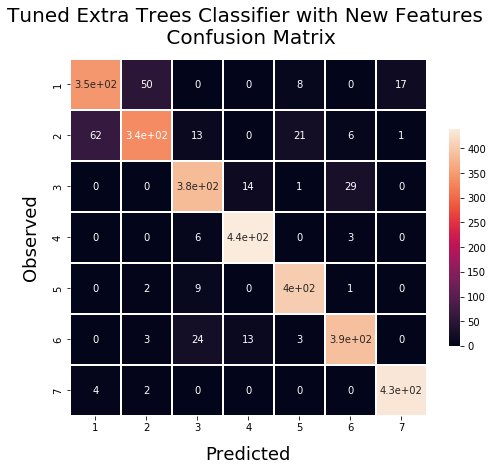

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Tuned Extra Trees Classifier with New Features,0.999008,0.903439,0.901551,0.903118,0.901791


In [79]:
# Printing model performance
evaluation(model_7, X_train, X_test, y_train, y_test, model_7_name)

<a id='8'></a>
# 8. Final Model - Voting Classifier

We have two models with impressive test accuracies trained on the same data with extra features: (1) Random Forest Classifier tuned with a grid search - `90.8%`, and (2) Extra trees Classifier tuned with a random search - `90.3%`.

Combining these two is a prudent next step. By combining the results of the two models we are able to leverage thier different approaches and cancel out their respective drawbacks. 

We can combine our models using a Voting Classifier. This allows us to impute both of our trained models and average their predictions to output a final result that reflects both of their calculations. 

In [80]:
# Training Classifiers
voting = VotingClassifier(estimators=[('Rf', model_6), ('Et', model_7)], n_jobs = -1)

voting_name = "Voting Classifier with RF & ET"

In [81]:
voting_classifier = voting.fit(X_train, y_train)

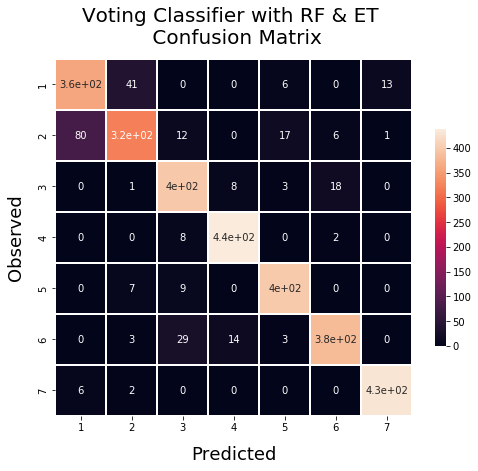

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Voting Classifier with RF & ET,0.999752,0.904431,0.903788,0.904315,0.902996


In [82]:
evaluation(voting_classifier, X_train, X_test, y_train, y_test, voting_name)

The Voting Classifier has an accuracy of `90.4%`, just 0.1% above the Extra Trees tuned classifier.

Our best, final model is the tuned Random Forest trained on extra features - 90.8%.

<a id='9'></a>
# 9. Saving Best Predictions

##### Conducting Feature Creation on Tester dataset

In [83]:
# Mean distances

tester['Mean_Amenities'] = (tester.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            tester.loc[:,"Horizontal_Distance_To_Hydrology"]   +
                            tester.loc[:,"Horizontal_Distance_To_Roadways"]) / 3

tester['Mean_Fire_Hyd'] = (tester.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            tester.loc[:,"Horizontal_Distance_To_Hydrology"]) / 2                      

                            
tester['Mean_Elevation_Vertical_Distance_Hydrology'] = (tester.loc[:,'Elevation'] 
                                                    + tester.loc[:,'Vertical_Distance_To_Hydrology'])/2

                            
tester['Mean_Distance_Hydrology_Firepoints'] = (tester.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                                 + tester.loc[:,'Horizontal_Distance_To_Fire_Points'])/2

                            
tester['Mean_Distance_Hydrology_Roadways'] = (tester.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                               + tester.loc[:,'Horizontal_Distance_To_Roadways'])/2

tester['Mean_Distance_Firepoints_Roadways'] = (tester.loc[:,'Horizontal_Distance_To_Fire_Points'] 
                                                + tester.loc[:,'Horizontal_Distance_To_Roadways'])/2

tester['EVDTH'] = tester['Elevation'] - tester['Vertical_Distance_To_Hydrology']


In [84]:
# Sums and Differences

tester['HF1'] = tester.loc[:,'Horizontal_Distance_To_Hydrology'] + tester.loc[:,'Horizontal_Distance_To_Fire_Points']

tester['HF2'] = abs(tester['Horizontal_Distance_To_Hydrology'] - tester['Horizontal_Distance_To_Fire_Points'])

tester['HR1'] = abs(tester['Horizontal_Distance_To_Hydrology'] + tester['Horizontal_Distance_To_Roadways'])

tester['HR2'] = abs(tester['Horizontal_Distance_To_Hydrology'] - tester['Horizontal_Distance_To_Roadways'])

tester['FR1'] = abs(tester['Horizontal_Distance_To_Fire_Points'] + tester['Horizontal_Distance_To_Roadways'])

tester['FR2'] = abs(tester['Horizontal_Distance_To_Fire_Points'] - tester['Horizontal_Distance_To_Roadways'])


In [85]:
def reverse_encode(relevant_subset):

    num_list =[]
    for i in relevant_subset.iloc:
        ix = 1
        for j in i:
            if j ==1:
                num_list.append(ix)
            else: 
                ix +=1
                
    print('The new list has the following elements: ' + str(set(num_list)))
    if relevant_subset.shape[0] == len(num_list):
        return num_list
    else: print('Error in compiling list: lengths of the two lists do not match.')

In [86]:
wilderness_test = tester.loc[:,'Wilderness_Area1':'Wilderness_Area4']

soiltype_test = tester.loc[:,'Soil_Type1':'Soil_Type40']

tester["wilderness"] = reverse_encode(wilderness_test)

tester["soiltypes"] = reverse_encode(soiltype_test)


The new list has the following elements: {1, 2, 3, 4}
The new list has the following elements: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


In [87]:
tester.drop(columns = "Id", inplace = True)

KeyError: "['Id'] not found in axis"

In [88]:
len(tester.columns) == len(X_train.columns)

True

##### Predicting on Tester

In [89]:
y_test_pred = model_6.predict(tester)

In [90]:
#Checking if test data and predictions array are the same length
len(tester) == len(y_test_pred)

True

In [91]:
#Creating a dataframe with predictions as a column
submission = pd.DataFrame(y_test_pred, columns = ["Cover_Type"])

#Creating "id" column with zero-based index id
submission["id"] = submission.index

# Ordering dataframe columns
cols = ["id", "Cover_Type"]

submission = submission[cols]

In [92]:
#Inspecting Dataframe
submission.head()

,id,Cover_Type
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


##### Creation Submission file

In [93]:
GroupB_predictions_Final = submission.to_csv('GroupB_predictions_Final.csv', index = False)
